# Homework - 3
***
**Name**: Ryan Leonard
***

This assignment is due on Canvas by **5pm on Friday October 19th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

### Problem - 1 [5 points]

Consider a single Boolean random variable $Y$ (the "classification"). Let the prior probability $P(Y= true)$ be $\pi$. Let's try to find $\pi$, given a training set $D = (y_1,\cdots, y_N)$ with $N$ independent samples of $Y$. Furthermore, suppose $p$ of the $N$ samples are positive (i.e, labeled as true) and $n$ of the $N$ samples are negative.

1. Write down an expression for the likelihood of $D$ (that is, the probability of seeing this particular sequence of examples, given a fixed value of $\pi$) in terms of $\pi$, $p$ and $n$.

The likelihood can be represented as:
$$\prod_{i=1}^{N} \pi^{y_i}(1-\pi)^{1-y_i}$$
But this can be broken up into the cases for the positive and negative examples:
$$ \prod_{i=1}^{p} \pi \text{ and } \prod_{i=1}^{n} 1-\pi$$

Which becomes simply:
$$ \pi^p(1-\pi)^n$$

2. By differentiating the log likelihood $L$, find the value of $\pi$ that maximizes the likelihood

First, we find the log likelihood:

$$log(\pi^p(1-\pi)^n) = log(\pi^p) + log((1-\pi)^n)$$
$$ = p log(\pi)+ nlog((1-\pi))$$
Next we differentiate and set the result equal to 0:
$$ \frac{p}{\pi} - \frac{n}{1-\pi} = 0$$


$$ \frac{p}{\pi} = \frac{n}{1-\pi}$$


$$ \frac{1-\pi}{\pi} = \frac{n}{p}$$

$$ \frac{1}{\pi} - 1 = \frac{n}{p}$$

$$ \pi = \frac{1}{\frac{n}{p}+1}$$

$$ \pi = \frac{p}{n+p}$$

3. Write down the likelihood for the data including the attributes, using the following additional notation:

    * $\alpha_i$ is $P(X_i = true | Y = true)$
    * $\beta_i$ is $P(X_i = true | Y = false)$
    * $p_i^+$ is the count of samples for which $X_i = true$ and $Y = true$
    * $n_i^+$ is the count of samples for which $X_i = false$ and $Y = true$
    * $p_i^-$ is the count of samples for which $X_i = true$ and $Y = false$
    * $n_i^-$ is the count of samples for which $X_i = false$ and $Y = false$

$$ P(y_1, y_2, ..., y_n | Y) = P(y_1|Y)P(y_2|Y)...P(y_n|Y) $$
$$ = \alpha^{p^+} (1-\alpha)^{n^+} \beta^{p^-} (1-\beta)^{n^-} $$

4. By differentiating the log likelihood L, find the values of $\alpha_i$ and $\beta_i$ (in terms of the various counts) that maximize the likelihood

first, we take the log of the expression in part 3:
$$ log(\alpha^{p^+} (1-\alpha)^{n^+} \beta^{p^-} (1-\beta)^{n^-})$$
With some logarithmic properties, this becomes:
$$ log(\alpha^{p^+}) + log( (1-\alpha)^{n^+}) + log( \beta^{p^-}) + log( (1-\beta)^{n^-}) )$$
$$ p^+ log(\alpha) + n^+ log( (1-\alpha)) + p^- log( \beta) + n^-log( (1-\beta)) )$$
To find the optimal value of $\alpha$, we take the derivative with respect to $\alpha$ and set the equation equal to 0:
$$\frac{ p^+ }{\alpha} - \frac{n^+}{1-\alpha} = 0$$ 
$$ \alpha = \frac{p^+}{n^+ + p^+}$$ 
and likewise for $\beta$

$$\frac{p^-}{\beta} - \frac{n^-}{1-\beta} = 0$$
$$ \beta = \frac{p^-}{n^- + p^-}$$ 


### Classification with "Naive Bayes" generative model [10 points]

In [1]:
from scipy.io import loadmat

class SPECT:
    def __init__(self):
        ff = lambda x, y : loadmat(x)[y]
        
        self.X_train = ff('data/SPECTtrainData.mat','trainData')
        self.y_train = ff('data/SPECTtrainLabels.mat','trainLabels')
        
        self.X_test = ff('data/SPECTtestData.mat', 'testData')
        self.y_test = ff('data/SPECTtestLabels.mat', 'testLabels')
        
        

In [2]:
# Label normal : 1 abnormal : 0
data1 = SPECT()

You are given the `SPECT` class with train and test data. These were created from the medical data on cardiac Single Proton Emission Tomography (SPECT) images of patients and each patient is classified into two categories: normal or abnormal. The database of 267 SPECT images sets (patients) was processed to extract features that summarize the original SPECT images. As a result, you are given a training set of 187 patterns and a test set of 80 patterns, each with 22 binary feature. The goal is to build a generative model of each group (normal: 1 and abnormal: 0), and to use these models to classify future patients. 

For each of the groups, use the training data to build a probabilistic model, assuming that the different features are independent. The model for a group should have 22 parameters $p_i \in [0,1]$; the probability of a particular data point $x \in \{0, 1\}^{22}$ is then

$$\prod_{i=1}^{22}p_i^{x_i}(1-p_i)^{1-x_i}$$

A natural choice is to set $p_i$ to the proportion of training documents (from that particular group) for which $x_i = 1$. In practice, this can be dangerous - when these are lots of features, and any given feature is 1 only a tiny fraction of the time, there often isn't enough data to reliably estimate all the $p_i$ in this way. Therefore, it is common to smooth the estimates somewhat, by setting:

$$ p_i = \frac{\text{(number of points with $x_i = 1$)} + n\tilde{p}}{\text{(number of points)} + n}$$

where n is a small integer and $\tilde{p}$ is a prior estimate of the value of $p_i$. To keep this simple, use $n=2$ and $\tilde{p}=0.5$

**Q:** Now implement Naive Bayes model to classify the test examples. Recall that `NaiveBayes` assumes that the conditional property of the features is independent given the label variable.

   * Finish `fit` method to generate probabilistic model for both the groups
   * Finish `predict` method to return predicted label for the data point 

In [ ]:
p_i = sum()

In [93]:
np.argwhere(data1.y_train==0)[:, 0].shape

(15,)

In [94]:
x_train = data1.X_train[data1.y_train.nonzero()[0]]
x_train.shape

(172, 22)

In [95]:
172 + 15

187

In [96]:
data1.X_train.shape

(187, 22)

In [3]:
import numpy as np
class NaiveBayes:
    def __init__(self, n = 2, prior = 0.5):
        """
        Create a NaiveBayes classifier
        :param n : small integer
        :param prior: prior estimate of the value of pi
        """
        
        self.n = n
        self.prior = prior
        self.normal_model = None
        self.abnormal_model = None

        
    def fit(self, X_train, y_train):
        """
        Generate probabilistic models for normal and abmornal group.
        Use self.normal_model and self.abnormal_model to store 
        models for normal and abnormal groups respectively
        """
        #TODO: Finish this function
        # 1. Split the table based on true and false labels:
        normal_indices = y_train.nonzero()[0]
        abnormal_indices = np.argwhere(data1.y_train==0)[:, 0]
        self.normal_model = X_train[normal_indices]
        self.abnormal_model = X_train[abnormal_indices]

        
    def compute_marginal(self, index, val, model):
        ones = sum(model[:, index]) 
        if val == 0:
            return ((model.shape[0] - ones) + (self.n * self.prior))/(model.shape[0] + self.n)
        else:
            return (ones + (self.n * self.prior))/(model.shape[0] + self.n)
        
    def compute_normalizing_constant(self, index, val):
        ones = sum(self.normal_model[:, index]) + sum(self.abnormal_model[:, index])
        if val == 0:
            return (self.normal_model.shape[0] + self.abnormal_model.shape[0] - ones) / (self.normal_model.shape[0] + self.abnormal_model.shape[0])
        else:
            return (ones) / (self.normal_model.shape[0] + self.abnormal_model.shape[0])
        
    def predict_single_datapoint(self, data):
        """
        Return predicted label for the input example
        :param data: input example
        """
        # Compute the probability of being in one class vs the other.
        prob_normal = 1
        # get the probability for each vector element
        for i in range(data.shape[0]):
            prob_normal *= self.compute_marginal(i, data[i], self.normal_model)
        prob_normal *= (self.normal_model.shape[0]) / (self.normal_model.shape[0] + self.abnormal_model.shape[0])
        
        prob_abnormal = 1
        for i in range(data.shape[0]):
            prob_abnormal *= self.compute_marginal(i, data[i], self.abnormal_model)
        prob_abnormal *= (self.abnormal_model.shape[0]) / (self.normal_model.shape[0] + self.abnormal_model.shape[0])
        
        # technically, we should divide by the normalizing constant although that wont change the answer.
        normalizing_constant =1 
        for i in range(data.shape[0]):
            normalizing_constant * self.compute_normalizing_constant(i, data[i])
            
        prob_normal /= normalizing_constant
        prob_abnormal /= normalizing_constant
#         print("Prob Normal: {}".format(prob_normal))
#         print("Prob Abnormal: {}".format(prob_abnormal))
        if prob_normal > prob_abnormal:
            return 1
        else:
            return 0
    
    def predict(self, dataset):
        results = []
        for i in range(dataset.shape[0]):
            results.append(self.predict_single_datapoint(dataset[i]))
        return results
    
    @staticmethod
    def accuracy(y_predicted, y_true):
        correct = 0
        for y_pred, real_y in zip(y_predicted, y_true):
            if y_pred == real_y:
                correct += 1
        return correct / y_true.shape[0]

**Q:** Find the error rate of your Naive Bayes algorithm on the test set

In [4]:
nb = NaiveBayes()
nb.fit(data1.X_train, data1.y_train)

In [5]:
predictions = nb.predict(data1.X_test)

In [6]:
accuracy = nb.accuracy(predictions, data1.y_test)

In [7]:
accuracy

0.8

In [8]:
1 - accuracy

0.19999999999999996

Our accuracy rate is 80%, which means that our error rate is 20%

### Logistic Regression - [15 points]

In [13]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [14]:
data2 = Numbers('data/mnist.pklz')

true label: 0


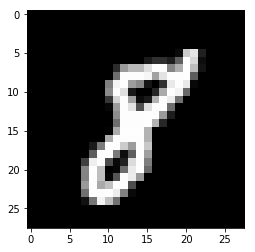

In [15]:
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
#view_digit(data2.train_x[0],data2.train_y[0])
view_digit(data2.train_x[1],data2.train_y[1])

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output corresponding label.
* Finish the `sigmoid` function to return the output of applying the sigmoid function the input parameter

* Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

In [26]:
np.random.rand(5)

array([0.06856129, 0.94746578, 0.55958858, 0.55647585, 0.30926716])

In [27]:
x_i

NameError: name 'x_i' is not defined

In [9]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [47]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        """
#         self.w = np.random.randn(num_features + 1)
        self.w = np.zeros(num_features + 1)
        self.eta = eta
        
    def compute_score(self, datapoint):
#         print("Dot Product: {}".format(np.dot(self.w[1:], datapoint)))
        return np.dot(self.w[1:], datapoint) + self.w[0]
        
    def sigmoid(self, score, threshold = 20.0):
        """
        Prevent overflow of exp by capping activation at 20.
        :param score: A real valued number to convert into a number between 0 and 1
        """
        
        if abs(score) > threshold:
            score = threshold * np.sign(score)
            
        return 1.0/(1.0 + np.e ** (-score))
        

    def sgd_update(self, x_i, y):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """
 
        # TODO: Finish this function to do a single stochastic gradient descent update
        # and return the updated weight vector
        score = self.compute_score(x_i)
#         print("Score: {}".format(score))
        prediction = self.sigmoid(score)
#         print("Prediction: {}".format(prediction))
#         print("Update value: {}".format(self.eta * (y - prediction) * prediction * (1-prediction)))
        self.w[1:] = self.w[1:] + self.eta * (y - prediction) * x_i
        self.w[0] = self.w[0] + self.eta * (y - prediction)
        # These two lines use a trick to adjust the learning rate
#         self.w[1:] = self.w[1:] + self.eta * (y - prediction) * prediction * (1-prediction) * x_i
#         self.w[0] = self.w[0] + self.eta * (y - prediction) * prediction * (1-prediction)
        return self.w
    
    
    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, computes the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """
 
        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = self.sigmoid(self.w[1:].dot(x_i) + self.w[0])
            if y == 1:
                logprob += np.log(p)
            else:
                logprob += np.log(1.0 - p)
 
            # Get accuracy
            if abs(y - p) < 0.5:
                num_right += 1
 
        return logprob, float(num_right) / float(len(examples_y))

**Q:** After completing the class above, loop over the training data and perform stochastic gradient descent for three different user-defined number of epochs, and five different values of eta range [1e-3, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

In [30]:
x_train = data2.train_x.copy()
y_train = data2.train_y.copy()


In [31]:
np.dot(x_train[0], lr.w[1:])

54.73667043786879

In [32]:
1/(1+np.exp(np.dot(x_train[0], lr.w[1:])))

1.691087467667596e-24

In [33]:
eta = 1
lr = LogReg(x_train.shape[1], eta)
weights_prev = np.zeros(shape=(x_train.shape[0] + 1, 1))
for x, y in zip(x_train, y_train):
#     print(x)
    weights = lr.sgd_update(x, y)
#     print("Weight Difference: {}".format(weights - weights_prev))
    weights_prev = weights


In [34]:
1/(1+np.exp(-69.32828667167715))

1.0

In [42]:
data2.train_y.shape

(9830,)

In [48]:
# Loop over training data and perform updates
# Sample code:
from sklearn.utils import shuffle
eta = 0.2
epochs = 10
x_train = data2.train_x.copy()
y_train = data2.train_y.copy()
final_valid_results=[]
final_train_results=[]
for eta in [0.001, 0.05, 0.1, 0.5, 1]:
# for eta in [0.01]:
    results_valid = []
    results_train = []
    iteration = 0
    lr = LogReg(x_train.shape[1], eta)
    for epoch in range(epochs):
        x_train, y_train = shuffle(x_train, y_train)
        for x, y in zip(x_train, y_train):
            lr.sgd_update(x, y)
            iteration += 1
            if np.mod(iteration, 100) == 0:
                valid_log_prob, valid_accuracy = lr.progress(data2.valid_x, data2.valid_y)
                results_valid.append([epoch, iteration, eta, valid_accuracy])
                train_log_prob, train_accuracy = lr.progress(data2.train_x, data2.train_y)
                results_train.append([epoch, iteration, eta, train_accuracy])
                print([epoch, iteration, eta, valid_accuracy])
#             print("inner loop: {}".format(results_valid))
#         print("outer loop: {}".format(results_valid))
                
    final_valid_results.append(results_valid)
    final_train_results.append(results_train)

    
# shuffle the data

[0, 100, 0.001, 0.9345177664974619]
[0, 200, 0.001, 0.9228426395939087]
[0, 300, 0.001, 0.9401015228426396]
[0, 400, 0.001, 0.9446700507614213]
[0, 500, 0.001, 0.9451776649746193]
[0, 600, 0.001, 0.9426395939086294]
[0, 700, 0.001, 0.9482233502538071]
[0, 800, 0.001, 0.9456852791878173]
[0, 900, 0.001, 0.9451776649746193]
[0, 1000, 0.001, 0.9467005076142132]
[0, 1100, 0.001, 0.9477157360406091]
[0, 1200, 0.001, 0.950253807106599]
[0, 1300, 0.001, 0.9527918781725888]
[0, 1400, 0.001, 0.9538071065989848]
[0, 1500, 0.001, 0.9558375634517766]
[0, 1600, 0.001, 0.9558375634517766]
[0, 1700, 0.001, 0.9553299492385787]
[0, 1800, 0.001, 0.9558375634517766]
[0, 1900, 0.001, 0.9558375634517766]
[0, 2000, 0.001, 0.9563451776649746]
[0, 2100, 0.001, 0.9553299492385787]
[0, 2200, 0.001, 0.9558375634517766]
[0, 2300, 0.001, 0.9563451776649746]
[0, 2400, 0.001, 0.9558375634517766]
[0, 2500, 0.001, 0.9563451776649746]
[0, 2600, 0.001, 0.9573604060913705]
[0, 2700, 0.001, 0.9568527918781726]
[0, 2800, 0

[2, 22100, 0.001, 0.9710659898477157]
[2, 22200, 0.001, 0.9710659898477157]
[2, 22300, 0.001, 0.9730964467005077]
[2, 22400, 0.001, 0.9710659898477157]
[2, 22500, 0.001, 0.9710659898477157]
[2, 22600, 0.001, 0.9710659898477157]
[2, 22700, 0.001, 0.9695431472081218]
[2, 22800, 0.001, 0.9690355329949238]
[2, 22900, 0.001, 0.9690355329949238]
[2, 23000, 0.001, 0.9690355329949238]
[2, 23100, 0.001, 0.9700507614213199]
[2, 23200, 0.001, 0.9695431472081218]
[2, 23300, 0.001, 0.9695431472081218]
[2, 23400, 0.001, 0.9710659898477157]
[2, 23500, 0.001, 0.9705583756345177]
[2, 23600, 0.001, 0.9705583756345177]
[2, 23700, 0.001, 0.9700507614213199]
[2, 23800, 0.001, 0.9700507614213199]
[2, 23900, 0.001, 0.9700507614213199]
[2, 24000, 0.001, 0.9710659898477157]
[2, 24100, 0.001, 0.9700507614213199]
[2, 24200, 0.001, 0.9705583756345177]
[2, 24300, 0.001, 0.9710659898477157]
[2, 24400, 0.001, 0.9710659898477157]
[2, 24500, 0.001, 0.9710659898477157]
[2, 24600, 0.001, 0.9705583756345177]
[2, 24700, 0

[4, 43700, 0.001, 0.9715736040609138]
[4, 43800, 0.001, 0.9705583756345177]
[4, 43900, 0.001, 0.9705583756345177]
[4, 44000, 0.001, 0.9705583756345177]
[4, 44100, 0.001, 0.9710659898477157]
[4, 44200, 0.001, 0.9720812182741116]
[4, 44300, 0.001, 0.9715736040609138]
[4, 44400, 0.001, 0.9715736040609138]
[4, 44500, 0.001, 0.9720812182741116]
[4, 44600, 0.001, 0.9725888324873097]
[4, 44700, 0.001, 0.9725888324873097]
[4, 44800, 0.001, 0.9746192893401016]
[4, 44900, 0.001, 0.9730964467005077]
[4, 45000, 0.001, 0.9725888324873097]
[4, 45100, 0.001, 0.9746192893401016]
[4, 45200, 0.001, 0.9751269035532995]
[4, 45300, 0.001, 0.9756345177664975]
[4, 45400, 0.001, 0.9751269035532995]
[4, 45500, 0.001, 0.9751269035532995]
[4, 45600, 0.001, 0.9751269035532995]
[4, 45700, 0.001, 0.9746192893401016]
[4, 45800, 0.001, 0.9751269035532995]
[4, 45900, 0.001, 0.9746192893401016]
[4, 46000, 0.001, 0.9746192893401016]
[4, 46100, 0.001, 0.9741116751269036]
[4, 46200, 0.001, 0.9720812182741116]
[4, 46300, 0

[6, 65400, 0.001, 0.9725888324873097]
[6, 65500, 0.001, 0.9730964467005077]
[6, 65600, 0.001, 0.9736040609137055]
[6, 65700, 0.001, 0.9736040609137055]
[6, 65800, 0.001, 0.9736040609137055]
[6, 65900, 0.001, 0.9736040609137055]
[6, 66000, 0.001, 0.9741116751269036]
[6, 66100, 0.001, 0.9736040609137055]
[6, 66200, 0.001, 0.9741116751269036]
[6, 66300, 0.001, 0.9751269035532995]
[6, 66400, 0.001, 0.9746192893401016]
[6, 66500, 0.001, 0.9730964467005077]
[6, 66600, 0.001, 0.9725888324873097]
[6, 66700, 0.001, 0.9741116751269036]
[6, 66800, 0.001, 0.9741116751269036]
[6, 66900, 0.001, 0.9730964467005077]
[6, 67000, 0.001, 0.9730964467005077]
[6, 67100, 0.001, 0.9736040609137055]
[6, 67200, 0.001, 0.9730964467005077]
[6, 67300, 0.001, 0.9725888324873097]
[6, 67400, 0.001, 0.9725888324873097]
[6, 67500, 0.001, 0.9730964467005077]
[6, 67600, 0.001, 0.9725888324873097]
[6, 67700, 0.001, 0.9725888324873097]
[6, 67800, 0.001, 0.9725888324873097]
[6, 67900, 0.001, 0.9725888324873097]
[6, 68000, 0

[8, 87200, 0.001, 0.9746192893401016]
[8, 87300, 0.001, 0.9736040609137055]
[8, 87400, 0.001, 0.9751269035532995]
[8, 87500, 0.001, 0.9751269035532995]
[8, 87600, 0.001, 0.9741116751269036]
[8, 87700, 0.001, 0.9741116751269036]
[8, 87800, 0.001, 0.9751269035532995]
[8, 87900, 0.001, 0.9756345177664975]
[8, 88000, 0.001, 0.9756345177664975]
[8, 88100, 0.001, 0.9746192893401016]
[8, 88200, 0.001, 0.9746192893401016]
[8, 88300, 0.001, 0.9736040609137055]
[8, 88400, 0.001, 0.9736040609137055]
[9, 88500, 0.001, 0.9741116751269036]
[9, 88600, 0.001, 0.9751269035532995]
[9, 88700, 0.001, 0.9741116751269036]
[9, 88800, 0.001, 0.9741116751269036]
[9, 88900, 0.001, 0.9741116751269036]
[9, 89000, 0.001, 0.9741116751269036]
[9, 89100, 0.001, 0.9746192893401016]
[9, 89200, 0.001, 0.9746192893401016]
[9, 89300, 0.001, 0.9741116751269036]
[9, 89400, 0.001, 0.9741116751269036]
[9, 89500, 0.001, 0.9741116751269036]
[9, 89600, 0.001, 0.9741116751269036]
[9, 89700, 0.001, 0.9746192893401016]
[9, 89800, 0

[1, 11300, 0.05, 0.9771573604060914]
[1, 11400, 0.05, 0.9700507614213199]
[1, 11500, 0.05, 0.9776649746192894]
[1, 11600, 0.05, 0.9766497461928934]
[1, 11700, 0.05, 0.9781725888324873]
[1, 11800, 0.05, 0.9756345177664975]
[1, 11900, 0.05, 0.9781725888324873]
[1, 12000, 0.05, 0.9786802030456853]
[1, 12100, 0.05, 0.9781725888324873]
[1, 12200, 0.05, 0.9781725888324873]
[1, 12300, 0.05, 0.9776649746192894]
[1, 12400, 0.05, 0.9796954314720813]
[1, 12500, 0.05, 0.9796954314720813]
[1, 12600, 0.05, 0.9730964467005077]
[1, 12700, 0.05, 0.9477157360406091]
[1, 12800, 0.05, 0.9786802030456853]
[1, 12900, 0.05, 0.9786802030456853]
[1, 13000, 0.05, 0.9796954314720813]
[1, 13100, 0.05, 0.9802030456852792]
[1, 13200, 0.05, 0.9791878172588833]
[1, 13300, 0.05, 0.9766497461928934]
[1, 13400, 0.05, 0.9766497461928934]
[1, 13500, 0.05, 0.9730964467005077]
[1, 13600, 0.05, 0.9786802030456853]
[1, 13700, 0.05, 0.9796954314720813]
[1, 13800, 0.05, 0.9766497461928934]
[1, 13900, 0.05, 0.9771573604060914]
[

[3, 33500, 0.05, 0.9776649746192894]
[3, 33600, 0.05, 0.9812182741116752]
[3, 33700, 0.05, 0.9827411167512691]
[3, 33800, 0.05, 0.9827411167512691]
[3, 33900, 0.05, 0.9796954314720813]
[3, 34000, 0.05, 0.9822335025380711]
[3, 34100, 0.05, 0.983756345177665]
[3, 34200, 0.05, 0.9827411167512691]
[3, 34300, 0.05, 0.9817258883248731]
[3, 34400, 0.05, 0.9822335025380711]
[3, 34500, 0.05, 0.9822335025380711]
[3, 34600, 0.05, 0.9766497461928934]
[3, 34700, 0.05, 0.9827411167512691]
[3, 34800, 0.05, 0.983756345177665]
[3, 34900, 0.05, 0.983248730964467]
[3, 35000, 0.05, 0.9822335025380711]
[3, 35100, 0.05, 0.983248730964467]
[3, 35200, 0.05, 0.983248730964467]
[3, 35300, 0.05, 0.983756345177665]
[3, 35400, 0.05, 0.9822335025380711]
[3, 35500, 0.05, 0.9847715736040609]
[3, 35600, 0.05, 0.9781725888324873]
[3, 35700, 0.05, 0.983248730964467]
[3, 35800, 0.05, 0.9812182741116752]
[3, 35900, 0.05, 0.984263959390863]
[3, 36000, 0.05, 0.9781725888324873]
[3, 36100, 0.05, 0.9827411167512691]
[3, 36200

[5, 56000, 0.05, 0.9812182741116752]
[5, 56100, 0.05, 0.9771573604060914]
[5, 56200, 0.05, 0.9812182741116752]
[5, 56300, 0.05, 0.9817258883248731]
[5, 56400, 0.05, 0.9807106598984772]
[5, 56500, 0.05, 0.9812182741116752]
[5, 56600, 0.05, 0.9817258883248731]
[5, 56700, 0.05, 0.9781725888324873]
[5, 56800, 0.05, 0.9776649746192894]
[5, 56900, 0.05, 0.9827411167512691]
[5, 57000, 0.05, 0.983756345177665]
[5, 57100, 0.05, 0.983248730964467]
[5, 57200, 0.05, 0.983248730964467]
[5, 57300, 0.05, 0.9822335025380711]
[5, 57400, 0.05, 0.9812182741116752]
[5, 57500, 0.05, 0.984263959390863]
[5, 57600, 0.05, 0.983248730964467]
[5, 57700, 0.05, 0.9807106598984772]
[5, 57800, 0.05, 0.9827411167512691]
[5, 57900, 0.05, 0.984263959390863]
[5, 58000, 0.05, 0.984263959390863]
[5, 58100, 0.05, 0.9812182741116752]
[5, 58200, 0.05, 0.9817258883248731]
[5, 58300, 0.05, 0.9725888324873097]
[5, 58400, 0.05, 0.9802030456852792]
[5, 58500, 0.05, 0.9817258883248731]
[5, 58600, 0.05, 0.9822335025380711]
[5, 5870

[7, 78400, 0.05, 0.9802030456852792]
[7, 78500, 0.05, 0.9817258883248731]
[7, 78600, 0.05, 0.9710659898477157]
[8, 78700, 0.05, 0.9812182741116752]
[8, 78800, 0.05, 0.9827411167512691]
[8, 78900, 0.05, 0.9822335025380711]
[8, 79000, 0.05, 0.9827411167512691]
[8, 79100, 0.05, 0.9796954314720813]
[8, 79200, 0.05, 0.9761421319796955]
[8, 79300, 0.05, 0.9796954314720813]
[8, 79400, 0.05, 0.9796954314720813]
[8, 79500, 0.05, 0.9807106598984772]
[8, 79600, 0.05, 0.9736040609137055]
[8, 79700, 0.05, 0.9812182741116752]
[8, 79800, 0.05, 0.9766497461928934]
[8, 79900, 0.05, 0.9827411167512691]
[8, 80000, 0.05, 0.9817258883248731]
[8, 80100, 0.05, 0.9802030456852792]
[8, 80200, 0.05, 0.983248730964467]
[8, 80300, 0.05, 0.9791878172588833]
[8, 80400, 0.05, 0.9822335025380711]
[8, 80500, 0.05, 0.983756345177665]
[8, 80600, 0.05, 0.983248730964467]
[8, 80700, 0.05, 0.983756345177665]
[8, 80800, 0.05, 0.9812182741116752]
[8, 80900, 0.05, 0.9796954314720813]
[8, 81000, 0.05, 0.9812182741116752]
[8, 8

[0, 2600, 0.1, 0.9720812182741116]
[0, 2700, 0.1, 0.9401015228426396]
[0, 2800, 0.1, 0.9776649746192894]
[0, 2900, 0.1, 0.9796954314720813]
[0, 3000, 0.1, 0.9695431472081218]
[0, 3100, 0.1, 0.9756345177664975]
[0, 3200, 0.1, 0.9720812182741116]
[0, 3300, 0.1, 0.9690355329949238]
[0, 3400, 0.1, 0.9517766497461929]
[0, 3500, 0.1, 0.9670050761421319]
[0, 3600, 0.1, 0.9741116751269036]
[0, 3700, 0.1, 0.9741116751269036]
[0, 3800, 0.1, 0.9548223350253807]
[0, 3900, 0.1, 0.9766497461928934]
[0, 4000, 0.1, 0.9776649746192894]
[0, 4100, 0.1, 0.9741116751269036]
[0, 4200, 0.1, 0.9730964467005077]
[0, 4300, 0.1, 0.9771573604060914]
[0, 4400, 0.1, 0.9710659898477157]
[0, 4500, 0.1, 0.9736040609137055]
[0, 4600, 0.1, 0.9796954314720813]
[0, 4700, 0.1, 0.9781725888324873]
[0, 4800, 0.1, 0.9725888324873097]
[0, 4900, 0.1, 0.9705583756345177]
[0, 5000, 0.1, 0.9512690355329949]
[0, 5100, 0.1, 0.9791878172588833]
[0, 5200, 0.1, 0.9781725888324873]
[0, 5300, 0.1, 0.9690355329949238]
[0, 5400, 0.1, 0.980

[2, 25700, 0.1, 0.9822335025380711]
[2, 25800, 0.1, 0.9822335025380711]
[2, 25900, 0.1, 0.9827411167512691]
[2, 26000, 0.1, 0.9807106598984772]
[2, 26100, 0.1, 0.9807106598984772]
[2, 26200, 0.1, 0.9802030456852792]
[2, 26300, 0.1, 0.9791878172588833]
[2, 26400, 0.1, 0.9791878172588833]
[2, 26500, 0.1, 0.9827411167512691]
[2, 26600, 0.1, 0.9766497461928934]
[2, 26700, 0.1, 0.9807106598984772]
[2, 26800, 0.1, 0.9507614213197969]
[2, 26900, 0.1, 0.9791878172588833]
[2, 27000, 0.1, 0.9812182741116752]
[2, 27100, 0.1, 0.9796954314720813]
[2, 27200, 0.1, 0.9827411167512691]
[2, 27300, 0.1, 0.9827411167512691]
[2, 27400, 0.1, 0.9812182741116752]
[2, 27500, 0.1, 0.9751269035532995]
[2, 27600, 0.1, 0.9751269035532995]
[2, 27700, 0.1, 0.9802030456852792]
[2, 27800, 0.1, 0.9812182741116752]
[2, 27900, 0.1, 0.9847715736040609]
[2, 28000, 0.1, 0.9807106598984772]
[2, 28100, 0.1, 0.9812182741116752]
[2, 28200, 0.1, 0.9781725888324873]
[2, 28300, 0.1, 0.9817258883248731]
[2, 28400, 0.1, 0.9796954314

[4, 48800, 0.1, 0.9812182741116752]
[4, 48900, 0.1, 0.9817258883248731]
[4, 49000, 0.1, 0.9482233502538071]
[4, 49100, 0.1, 0.9802030456852792]
[5, 49200, 0.1, 0.9852791878172589]
[5, 49300, 0.1, 0.983756345177665]
[5, 49400, 0.1, 0.983756345177665]
[5, 49500, 0.1, 0.983248730964467]
[5, 49600, 0.1, 0.9578680203045685]
[5, 49700, 0.1, 0.9786802030456853]
[5, 49800, 0.1, 0.9796954314720813]
[5, 49900, 0.1, 0.9720812182741116]
[5, 50000, 0.1, 0.9827411167512691]
[5, 50100, 0.1, 0.983756345177665]
[5, 50200, 0.1, 0.9710659898477157]
[5, 50300, 0.1, 0.9786802030456853]
[5, 50400, 0.1, 0.9822335025380711]
[5, 50500, 0.1, 0.9827411167512691]
[5, 50600, 0.1, 0.9822335025380711]
[5, 50700, 0.1, 0.9812182741116752]
[5, 50800, 0.1, 0.9827411167512691]
[5, 50900, 0.1, 0.9756345177664975]
[5, 51000, 0.1, 0.9817258883248731]
[5, 51100, 0.1, 0.983248730964467]
[5, 51200, 0.1, 0.9796954314720813]
[5, 51300, 0.1, 0.9822335025380711]
[5, 51400, 0.1, 0.9781725888324873]
[5, 51500, 0.1, 0.977157360406091

[7, 71700, 0.1, 0.9791878172588833]
[7, 71800, 0.1, 0.9817258883248731]
[7, 71900, 0.1, 0.9817258883248731]
[7, 72000, 0.1, 0.9812182741116752]
[7, 72100, 0.1, 0.9817258883248731]
[7, 72200, 0.1, 0.983756345177665]
[7, 72300, 0.1, 0.9796954314720813]
[7, 72400, 0.1, 0.9852791878172589]
[7, 72500, 0.1, 0.983756345177665]
[7, 72600, 0.1, 0.9776649746192894]
[7, 72700, 0.1, 0.9776649746192894]
[7, 72800, 0.1, 0.983756345177665]
[7, 72900, 0.1, 0.9822335025380711]
[7, 73000, 0.1, 0.9715736040609138]
[7, 73100, 0.1, 0.9812182741116752]
[7, 73200, 0.1, 0.968020304568528]
[7, 73300, 0.1, 0.9817258883248731]
[7, 73400, 0.1, 0.9827411167512691]
[7, 73500, 0.1, 0.9685279187817258]
[7, 73600, 0.1, 0.9791878172588833]
[7, 73700, 0.1, 0.9766497461928934]
[7, 73800, 0.1, 0.9796954314720813]
[7, 73900, 0.1, 0.9796954314720813]
[7, 74000, 0.1, 0.9791878172588833]
[7, 74100, 0.1, 0.9796954314720813]
[7, 74200, 0.1, 0.9817258883248731]
[7, 74300, 0.1, 0.9751269035532995]
[7, 74400, 0.1, 0.97918781725888

[9, 94600, 0.1, 0.9822335025380711]
[9, 94700, 0.1, 0.9776649746192894]
[9, 94800, 0.1, 0.9791878172588833]
[9, 94900, 0.1, 0.9563451776649746]
[9, 95000, 0.1, 0.9817258883248731]
[9, 95100, 0.1, 0.9796954314720813]
[9, 95200, 0.1, 0.9771573604060914]
[9, 95300, 0.1, 0.983756345177665]
[9, 95400, 0.1, 0.9822335025380711]
[9, 95500, 0.1, 0.9796954314720813]
[9, 95600, 0.1, 0.9822335025380711]
[9, 95700, 0.1, 0.9639593908629441]
[9, 95800, 0.1, 0.9817258883248731]
[9, 95900, 0.1, 0.9812182741116752]
[9, 96000, 0.1, 0.9827411167512691]
[9, 96100, 0.1, 0.9725888324873097]
[9, 96200, 0.1, 0.9736040609137055]
[9, 96300, 0.1, 0.9791878172588833]
[9, 96400, 0.1, 0.9827411167512691]
[9, 96500, 0.1, 0.9827411167512691]
[9, 96600, 0.1, 0.9796954314720813]
[9, 96700, 0.1, 0.9807106598984772]
[9, 96800, 0.1, 0.9812182741116752]
[9, 96900, 0.1, 0.9781725888324873]
[9, 97000, 0.1, 0.9781725888324873]
[9, 97100, 0.1, 0.9802030456852792]
[9, 97200, 0.1, 0.9817258883248731]
[9, 97300, 0.1, 0.98020304568

[1, 19500, 0.5, 0.9751269035532995]
[1, 19600, 0.5, 0.9786802030456853]
[2, 19700, 0.5, 0.9705583756345177]
[2, 19800, 0.5, 0.9614213197969543]
[2, 19900, 0.5, 0.9685279187817258]
[2, 20000, 0.5, 0.9776649746192894]
[2, 20100, 0.5, 0.9736040609137055]
[2, 20200, 0.5, 0.9705583756345177]
[2, 20300, 0.5, 0.965482233502538]
[2, 20400, 0.5, 0.9736040609137055]
[2, 20500, 0.5, 0.9375634517766498]
[2, 20600, 0.5, 0.9786802030456853]
[2, 20700, 0.5, 0.965989847715736]
[2, 20800, 0.5, 0.9573604060913705]
[2, 20900, 0.5, 0.9781725888324873]
[2, 21000, 0.5, 0.965482233502538]
[2, 21100, 0.5, 0.9720812182741116]
[2, 21200, 0.5, 0.9786802030456853]
[2, 21300, 0.5, 0.9796954314720813]
[2, 21400, 0.5, 0.9771573604060914]
[2, 21500, 0.5, 0.9771573604060914]
[2, 21600, 0.5, 0.9710659898477157]
[2, 21700, 0.5, 0.9807106598984772]
[2, 21800, 0.5, 0.9604060913705583]
[2, 21900, 0.5, 0.9812182741116752]
[2, 22000, 0.5, 0.9720812182741116]
[2, 22100, 0.5, 0.9720812182741116]
[2, 22200, 0.5, 0.9553299492385

[4, 42300, 0.5, 0.9705583756345177]
[4, 42400, 0.5, 0.9796954314720813]
[4, 42500, 0.5, 0.9796954314720813]
[4, 42600, 0.5, 0.9751269035532995]
[4, 42700, 0.5, 0.9634517766497462]
[4, 42800, 0.5, 0.9756345177664975]
[4, 42900, 0.5, 0.9766497461928934]
[4, 43000, 0.5, 0.9766497461928934]
[4, 43100, 0.5, 0.9761421319796955]
[4, 43200, 0.5, 0.9771573604060914]
[4, 43300, 0.5, 0.9736040609137055]
[4, 43400, 0.5, 0.9715736040609138]
[4, 43500, 0.5, 0.9583756345177665]
[4, 43600, 0.5, 0.9771573604060914]
[4, 43700, 0.5, 0.9766497461928934]
[4, 43800, 0.5, 0.9761421319796955]
[4, 43900, 0.5, 0.9705583756345177]
[4, 44000, 0.5, 0.9746192893401016]
[4, 44100, 0.5, 0.9766497461928934]
[4, 44200, 0.5, 0.9776649746192894]
[4, 44300, 0.5, 0.9598984771573604]
[4, 44400, 0.5, 0.9720812182741116]
[4, 44500, 0.5, 0.9791878172588833]
[4, 44600, 0.5, 0.9791878172588833]
[4, 44700, 0.5, 0.9771573604060914]
[4, 44800, 0.5, 0.9776649746192894]
[4, 44900, 0.5, 0.9776649746192894]
[4, 45000, 0.5, 0.9786802030

[6, 65100, 0.5, 0.9791878172588833]
[6, 65200, 0.5, 0.9761421319796955]
[6, 65300, 0.5, 0.9761421319796955]
[6, 65400, 0.5, 0.9751269035532995]
[6, 65500, 0.5, 0.9807106598984772]
[6, 65600, 0.5, 0.9807106598984772]
[6, 65700, 0.5, 0.9751269035532995]
[6, 65800, 0.5, 0.9791878172588833]
[6, 65900, 0.5, 0.9786802030456853]
[6, 66000, 0.5, 0.9807106598984772]
[6, 66100, 0.5, 0.9781725888324873]
[6, 66200, 0.5, 0.9781725888324873]
[6, 66300, 0.5, 0.9725888324873097]
[6, 66400, 0.5, 0.9786802030456853]
[6, 66500, 0.5, 0.9781725888324873]
[6, 66600, 0.5, 0.9639593908629441]
[6, 66700, 0.5, 0.9639593908629441]
[6, 66800, 0.5, 0.9751269035532995]
[6, 66900, 0.5, 0.9695431472081218]
[6, 67000, 0.5, 0.9776649746192894]
[6, 67100, 0.5, 0.9796954314720813]
[6, 67200, 0.5, 0.9695431472081218]
[6, 67300, 0.5, 0.9761421319796955]
[6, 67400, 0.5, 0.965482233502538]
[6, 67500, 0.5, 0.9796954314720813]
[6, 67600, 0.5, 0.9812182741116752]
[6, 67700, 0.5, 0.9710659898477157]
[6, 67800, 0.5, 0.97563451776

[8, 87900, 0.5, 0.9776649746192894]
[8, 88000, 0.5, 0.9771573604060914]
[8, 88100, 0.5, 0.9771573604060914]
[8, 88200, 0.5, 0.9781725888324873]
[8, 88300, 0.5, 0.9634517766497462]
[8, 88400, 0.5, 0.9766497461928934]
[9, 88500, 0.5, 0.9822335025380711]
[9, 88600, 0.5, 0.9812182741116752]
[9, 88700, 0.5, 0.9802030456852792]
[9, 88800, 0.5, 0.9812182741116752]
[9, 88900, 0.5, 0.9766497461928934]
[9, 89000, 0.5, 0.9827411167512691]
[9, 89100, 0.5, 0.9756345177664975]
[9, 89200, 0.5, 0.9791878172588833]
[9, 89300, 0.5, 0.9791878172588833]
[9, 89400, 0.5, 0.9791878172588833]
[9, 89500, 0.5, 0.983756345177665]
[9, 89600, 0.5, 0.9822335025380711]
[9, 89700, 0.5, 0.9751269035532995]
[9, 89800, 0.5, 0.9796954314720813]
[9, 89900, 0.5, 0.9771573604060914]
[9, 90000, 0.5, 0.9771573604060914]
[9, 90100, 0.5, 0.9781725888324873]
[9, 90200, 0.5, 0.9639593908629441]
[9, 90300, 0.5, 0.9730964467005077]
[9, 90400, 0.5, 0.9781725888324873]
[9, 90500, 0.5, 0.9776649746192894]
[9, 90600, 0.5, 0.97817258883

[1, 13600, 1, 0.9639593908629441]
[1, 13700, 1, 0.9807106598984772]
[1, 13800, 1, 0.9573604060913705]
[1, 13900, 1, 0.9771573604060914]
[1, 14000, 1, 0.9705583756345177]
[1, 14100, 1, 0.9796954314720813]
[1, 14200, 1, 0.9796954314720813]
[1, 14300, 1, 0.9807106598984772]
[1, 14400, 1, 0.9781725888324873]
[1, 14500, 1, 0.9756345177664975]
[1, 14600, 1, 0.9766497461928934]
[1, 14700, 1, 0.9802030456852792]
[1, 14800, 1, 0.9634517766497462]
[1, 14900, 1, 0.9756345177664975]
[1, 15000, 1, 0.9807106598984772]
[1, 15100, 1, 0.9802030456852792]
[1, 15200, 1, 0.9771573604060914]
[1, 15300, 1, 0.9786802030456853]
[1, 15400, 1, 0.9649746192893401]
[1, 15500, 1, 0.9741116751269036]
[1, 15600, 1, 0.9649746192893401]
[1, 15700, 1, 0.9705583756345177]
[1, 15800, 1, 0.9553299492385787]
[1, 15900, 1, 0.9573604060913705]
[1, 16000, 1, 0.9578680203045685]
[1, 16100, 1, 0.9685279187817258]
[1, 16200, 1, 0.9715736040609138]
[1, 16300, 1, 0.9670050761421319]
[1, 16400, 1, 0.9746192893401016]
[1, 16500, 1, 

[3, 37800, 1, 0.9807106598984772]
[3, 37900, 1, 0.9791878172588833]
[3, 38000, 1, 0.9644670050761421]
[3, 38100, 1, 0.9796954314720813]
[3, 38200, 1, 0.9776649746192894]
[3, 38300, 1, 0.9802030456852792]
[3, 38400, 1, 0.9802030456852792]
[3, 38500, 1, 0.9802030456852792]
[3, 38600, 1, 0.9807106598984772]
[3, 38700, 1, 0.9791878172588833]
[3, 38800, 1, 0.9761421319796955]
[3, 38900, 1, 0.9730964467005077]
[3, 39000, 1, 0.9791878172588833]
[3, 39100, 1, 0.9715736040609138]
[3, 39200, 1, 0.9791878172588833]
[3, 39300, 1, 0.9771573604060914]
[4, 39400, 1, 0.9741116751269036]
[4, 39500, 1, 0.9807106598984772]
[4, 39600, 1, 0.9776649746192894]
[4, 39700, 1, 0.9720812182741116]
[4, 39800, 1, 0.9736040609137055]
[4, 39900, 1, 0.9741116751269036]
[4, 40000, 1, 0.9786802030456853]
[4, 40100, 1, 0.9807106598984772]
[4, 40200, 1, 0.9807106598984772]
[4, 40300, 1, 0.9812182741116752]
[4, 40400, 1, 0.9776649746192894]
[4, 40500, 1, 0.965482233502538]
[4, 40600, 1, 0.9817258883248731]
[4, 40700, 1, 0

[6, 62000, 1, 0.9761421319796955]
[6, 62100, 1, 0.9802030456852792]
[6, 62200, 1, 0.9756345177664975]
[6, 62300, 1, 0.9751269035532995]
[6, 62400, 1, 0.9588832487309644]
[6, 62500, 1, 0.9796954314720813]
[6, 62600, 1, 0.9649746192893401]
[6, 62700, 1, 0.9786802030456853]
[6, 62800, 1, 0.9472081218274112]
[6, 62900, 1, 0.9791878172588833]
[6, 63000, 1, 0.9756345177664975]
[6, 63100, 1, 0.9720812182741116]
[6, 63200, 1, 0.9720812182741116]
[6, 63300, 1, 0.9730964467005077]
[6, 63400, 1, 0.9791878172588833]
[6, 63500, 1, 0.9746192893401016]
[6, 63600, 1, 0.9741116751269036]
[6, 63700, 1, 0.9624365482233502]
[6, 63800, 1, 0.9736040609137055]
[6, 63900, 1, 0.9675126903553299]
[6, 64000, 1, 0.9766497461928934]
[6, 64100, 1, 0.9827411167512691]
[6, 64200, 1, 0.9802030456852792]
[6, 64300, 1, 0.9751269035532995]
[6, 64400, 1, 0.9822335025380711]
[6, 64500, 1, 0.9791878172588833]
[6, 64600, 1, 0.9741116751269036]
[6, 64700, 1, 0.9741116751269036]
[6, 64800, 1, 0.9746192893401016]
[6, 64900, 1, 

[8, 86200, 1, 0.9736040609137055]
[8, 86300, 1, 0.9781725888324873]
[8, 86400, 1, 0.9781725888324873]
[8, 86500, 1, 0.9786802030456853]
[8, 86600, 1, 0.965989847715736]
[8, 86700, 1, 0.9791878172588833]
[8, 86800, 1, 0.9822335025380711]
[8, 86900, 1, 0.9776649746192894]
[8, 87000, 1, 0.9817258883248731]
[8, 87100, 1, 0.9766497461928934]
[8, 87200, 1, 0.9822335025380711]
[8, 87300, 1, 0.966497461928934]
[8, 87400, 1, 0.9756345177664975]
[8, 87500, 1, 0.9807106598984772]
[8, 87600, 1, 0.9741116751269036]
[8, 87700, 1, 0.9827411167512691]
[8, 87800, 1, 0.9426395939086294]
[8, 87900, 1, 0.9705583756345177]
[8, 88000, 1, 0.9786802030456853]
[8, 88100, 1, 0.9802030456852792]
[8, 88200, 1, 0.9802030456852792]
[8, 88300, 1, 0.9761421319796955]
[8, 88400, 1, 0.9807106598984772]
[9, 88500, 1, 0.9766497461928934]
[9, 88600, 1, 0.9776649746192894]
[9, 88700, 1, 0.9776649746192894]
[9, 88800, 1, 0.9781725888324873]
[9, 88900, 1, 0.9609137055837563]
[9, 89000, 1, 0.9700507614213199]
[9, 89100, 1, 0.

In [23]:
final_valid_arrays = [np.array(result) for result in final_valid_results]
final_train_arrays = [np.array(result) for result in final_train_results]

Text(0.5,1,'Weight Map')

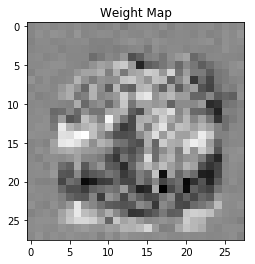

In [41]:
plt.imshow(lr.w[1:].reshape(28,28), cmap='gray');
plt.title("Weight Map")

In [61]:
iterarion = epoch * 9830
test = final_valid_arrays[2][:iterarion, -1].shape
final_valid_arrays[2].shape

(983, 4)

## Training accuracy over 1 epoch

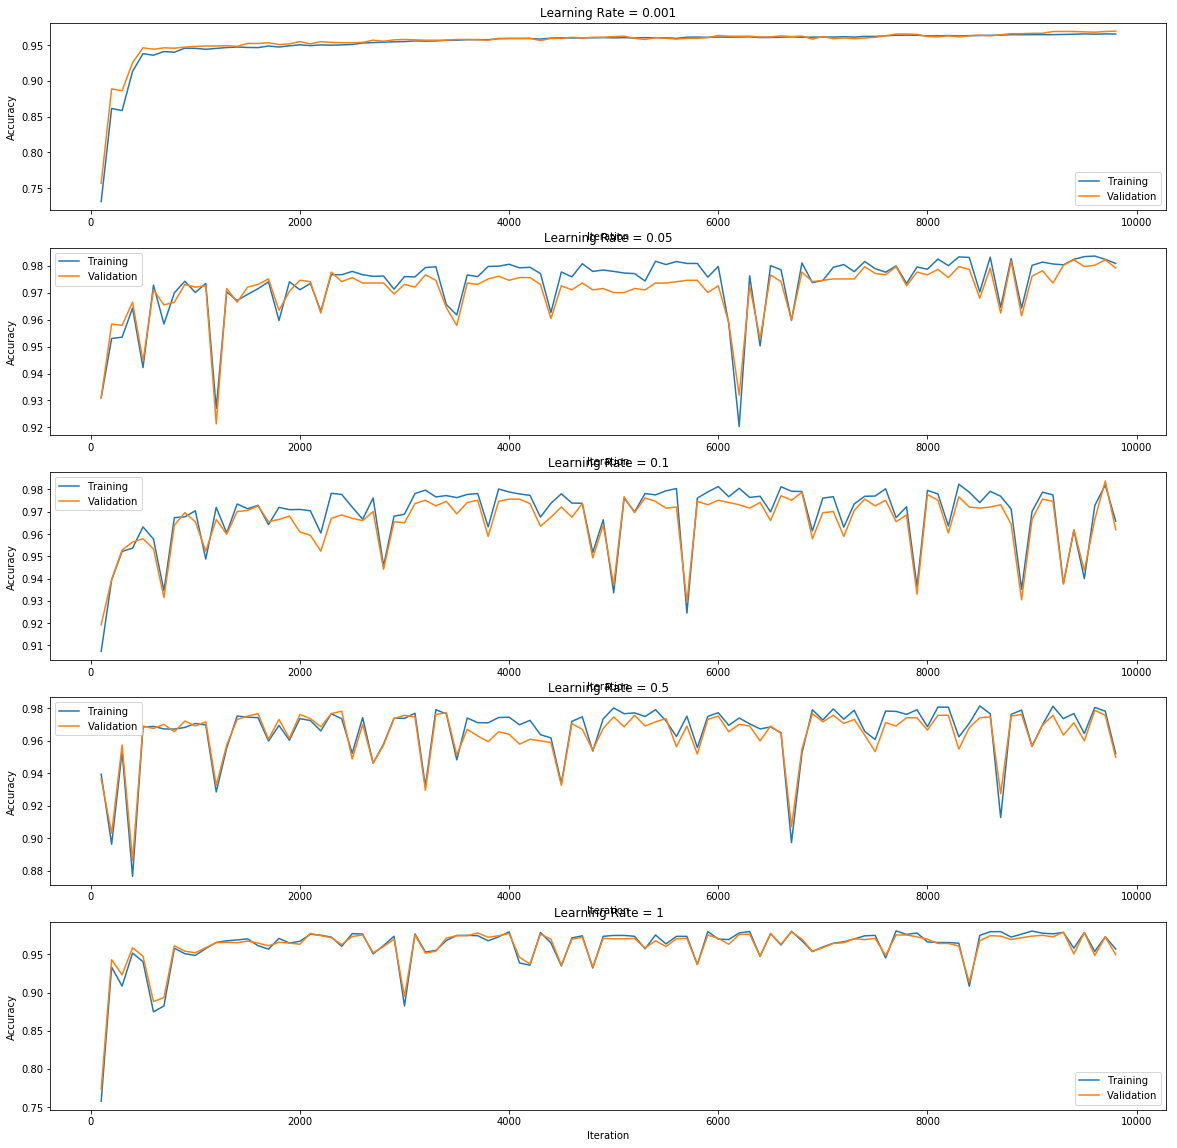

In [67]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 1
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])



## Training accuracy over 5 epoch

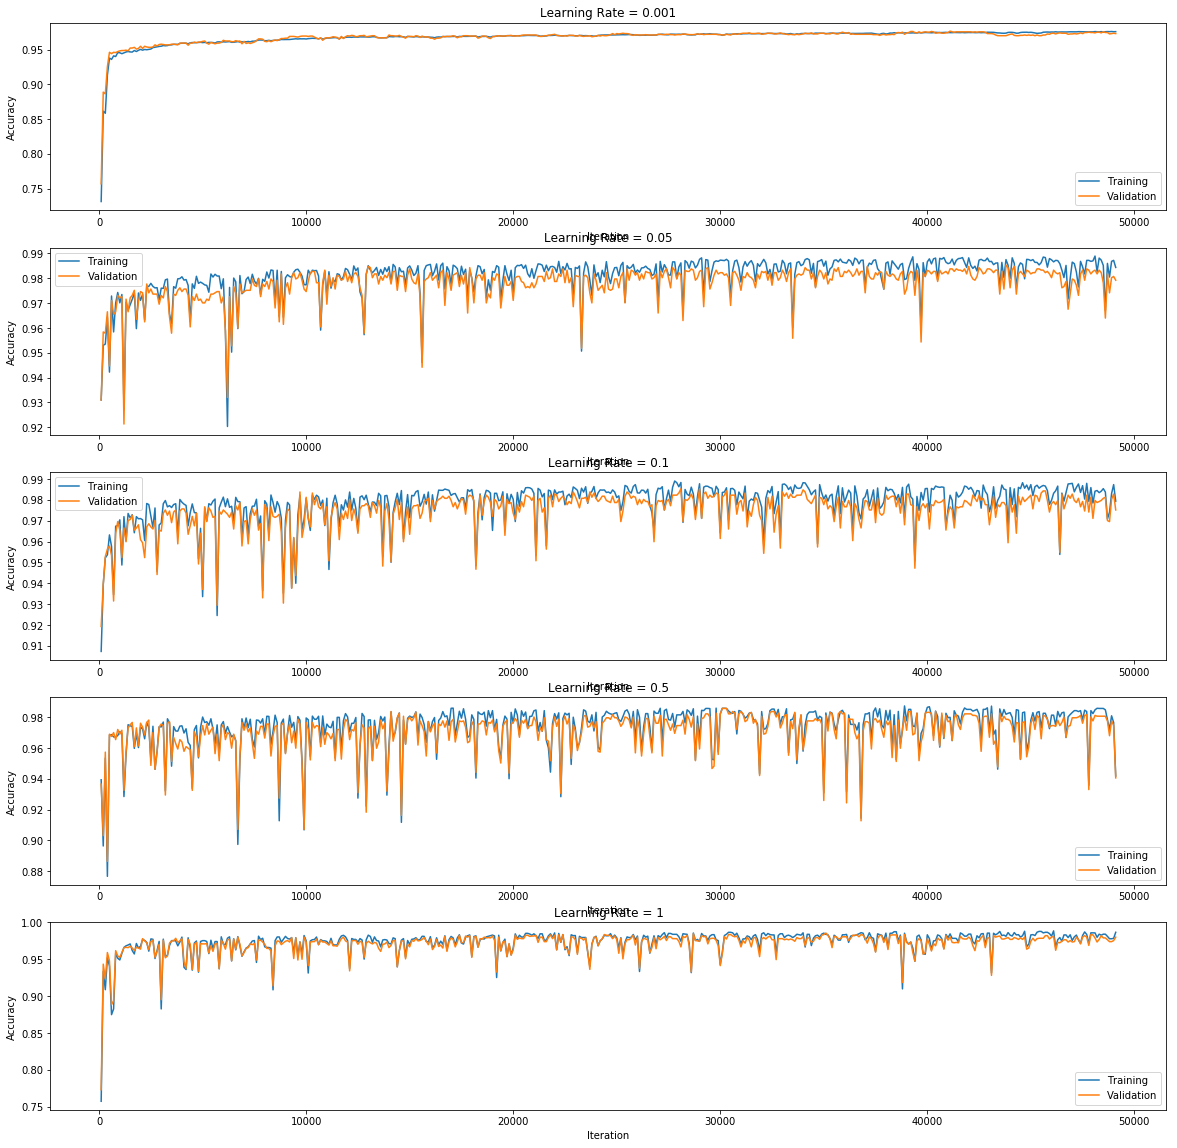

In [71]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 5
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])



## Training accuracy over 10 epochs

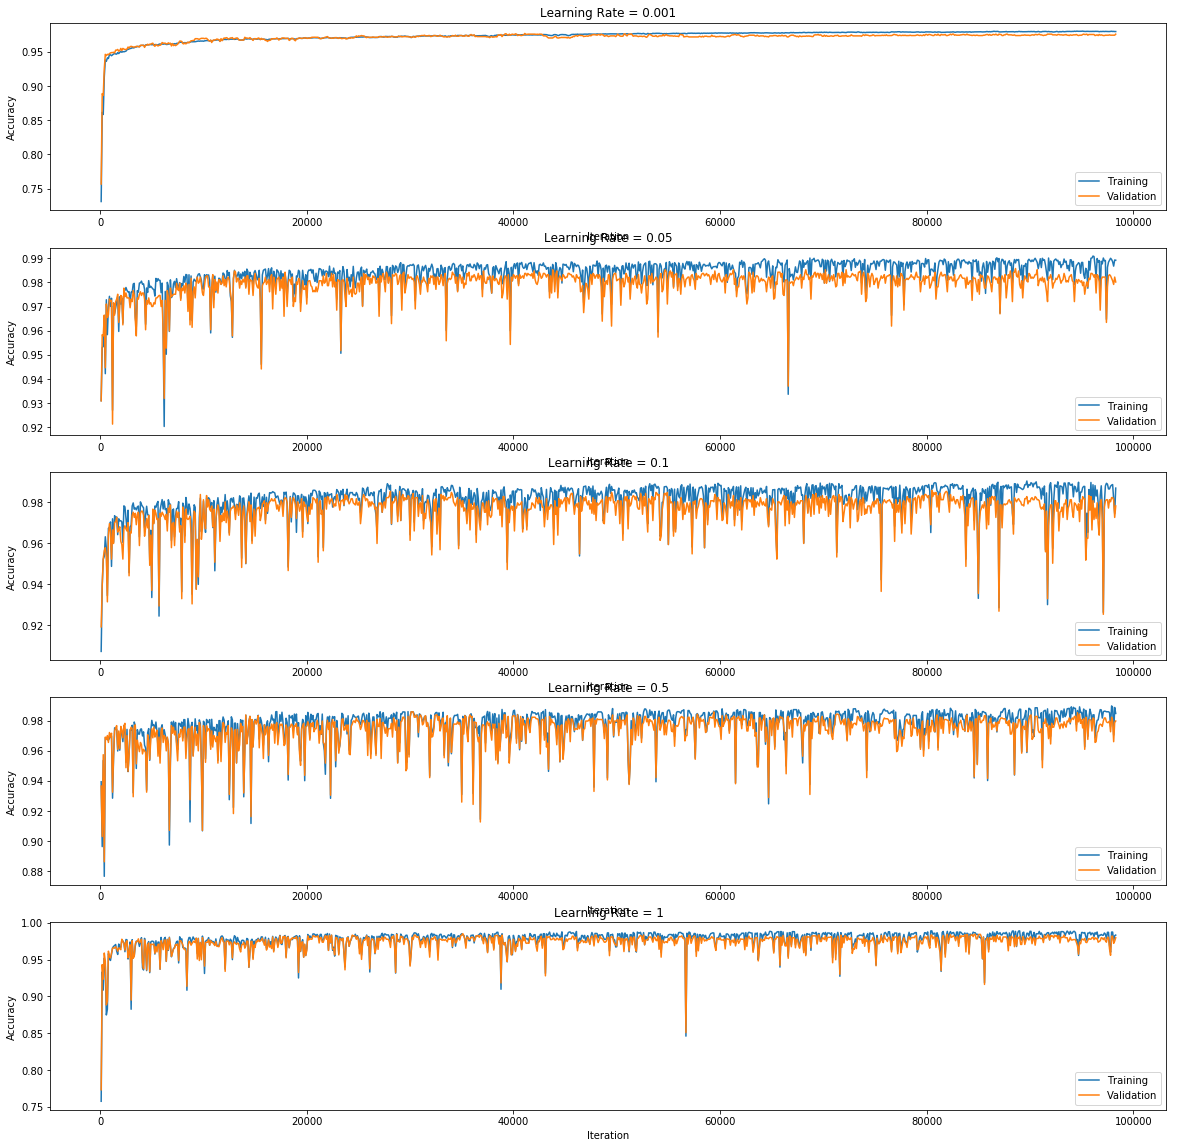

In [70]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 10
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])



In [27]:
for data in final_train_arrays:
    print("For the training dataset, the final accuracy with learning rate {} was {}".format(data[-1, -2], data[-1, -1]))

For the training dataset, the final accuracy with learning rate 0.001 was 0.9794506612410987
For the training dataset, the final accuracy with learning rate 0.05 was 0.9892166836215667
For the training dataset, the final accuracy with learning rate 0.1 was 0.9868769074262462
For the training dataset, the final accuracy with learning rate 0.5 was 0.9847405900305188
For the training dataset, the final accuracy with learning rate 1.0 was 0.9833163784333673


In [28]:
for data in final_valid_arrays:
    print("For the training dataset, the final accuracy with learning rate {} was {}".format(data[-1, -2], data[-1, -1]))

For the training dataset, the final accuracy with learning rate 0.001 was 0.9756345177664975
For the training dataset, the final accuracy with learning rate 0.05 was 0.9802030456852792
For the training dataset, the final accuracy with learning rate 0.1 was 0.9781725888324873
For the training dataset, the final accuracy with learning rate 0.5 was 0.9796954314720813
For the training dataset, the final accuracy with learning rate 1.0 was 0.9796954314720813


After 10 epochs, the learning rate of 0.05 was able to obtain the best accuracy.

**Q:** Describe the role of learning rate (eta) on the efficiency of convergence during training?

The learning rate is an important factor for the convergence of logistic regression. Choosing a learning rate that is too small will result in your regression taking a very long time to converge, whereas choosing a value that is too large will cause gradient descent to repeatedly jump over the global minima. 

In the examples above, we can see that while the largest learning rate both converged quickly obtained the greatest accuracy for both training and validation data, it was prone to random fluctuations in accuracy. Meanwhile, the lowest learning rate didnt suffer from any wild fluctuations, but it never obtained the same maximum accuracy as the highest learning rate trial.

**Q:** Describe the role of the number of epochs on validation accuracy?

The number of epochs controls how many times the learning algorithm will see the same datapoints. By shuffling the data between epochs, we can help to prevent our data from performing cyclic updates, thus minimizing the impact of outliers. However, by training over too many epochs, we run the risk of over fitting our datasets.

As the number of epochs increases, validation accuracy increases to a point, but then begins to dip as we start to overfit our model.

# Fun experimentation with logistic regression variants:

### Random Initialization of weights

In [72]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        """
        self.w = np.random.randn(num_features + 1)
#         self.w = np.zeros(num_features + 1)
        self.eta = eta
        
    def compute_score(self, datapoint):
#         print("Dot Product: {}".format(np.dot(self.w[1:], datapoint)))
        return np.dot(self.w[1:], datapoint) + self.w[0]
        
    def sigmoid(self, score, threshold = 20.0):
        """
        Prevent overflow of exp by capping activation at 20.
        :param score: A real valued number to convert into a number between 0 and 1
        """
        
        if abs(score) > threshold:
            score = threshold * np.sign(score)
            
        return 1.0/(1.0 + np.e ** (-score))
        

    def sgd_update(self, x_i, y):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """
 
        # TODO: Finish this function to do a single stochastic gradient descent update
        # and return the updated weight vector
        score = self.compute_score(x_i)
#         print("Score: {}".format(score))
        prediction = self.sigmoid(score)
#         print("Prediction: {}".format(prediction))
#         print("Update value: {}".format(self.eta * (y - prediction) * prediction * (1-prediction)))
        self.w[1:] = self.w[1:] + self.eta * (y - prediction) * x_i
        self.w[0] = self.w[0] + self.eta * (y - prediction)
        # These two lines use a trick to adjust the learning rate
#         self.w[1:] = self.w[1:] + self.eta * (y - prediction) * prediction * (1-prediction) * x_i
#         self.w[0] = self.w[0] + self.eta * (y - prediction) * prediction * (1-prediction)
        return self.w
    
    
    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, computes the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """
 
        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = self.sigmoid(self.w[1:].dot(x_i) + self.w[0])
            if y == 1:
                logprob += np.log(p)
            else:
                logprob += np.log(1.0 - p)
 
            # Get accuracy
            if abs(y - p) < 0.5:
                num_right += 1
 
        return logprob, float(num_right) / float(len(examples_y))

**Q:** After completing the class above, loop over the training data and perform stochastic gradient descent for three different user-defined number of epochs, and five different values of eta range [1e-3, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

In [73]:
x_train = data2.train_x.copy()
y_train = data2.train_y.copy()


In [74]:
eta = 1
lr = LogReg(x_train.shape[1], eta)
weights_prev = np.zeros(shape=(x_train.shape[0] + 1, 1))
for x, y in zip(x_train, y_train):
#     print(x)
    weights = lr.sgd_update(x, y)
#     print("Weight Difference: {}".format(weights - weights_prev))
    weights_prev = weights


In [32]:
1/(1+np.exp(np.dot(x_train[0], lr.w[1:])))

1.691087467667596e-24

In [75]:
# Loop over training data and perform updates
# Sample code:
from sklearn.utils import shuffle
eta = 0.2
epochs = 10
x_train = data2.train_x.copy()
y_train = data2.train_y.copy()
final_valid_results=[]
final_train_results=[]
for eta in [0.001, 0.05, 0.1, 0.5, 1]:
# for eta in [0.01]:
    results_valid = []
    results_train = []
    iteration = 0
    lr = LogReg(x_train.shape[1], eta)
    for epoch in range(epochs):
        x_train, y_train = shuffle(x_train, y_train)
        for x, y in zip(x_train, y_train):
            lr.sgd_update(x, y)
            iteration += 1
            if np.mod(iteration, 100) == 0:
                valid_log_prob, valid_accuracy = lr.progress(data2.valid_x, data2.valid_y)
                results_valid.append([epoch, iteration, eta, valid_accuracy])
                train_log_prob, train_accuracy = lr.progress(data2.train_x, data2.train_y)
                results_train.append([epoch, iteration, eta, train_accuracy])
#                 print([epoch, iteration, eta, valid_accuracy])
#             print("inner loop: {}".format(results_valid))
#         print("outer loop: {}".format(results_valid))
                
    final_valid_results.append(results_valid)
    final_train_results.append(results_train)

    
# shuffle the data

[0, 100, 0.001, 0.36548223350253806]
[0, 200, 0.001, 0.3715736040609137]
[0, 300, 0.001, 0.3883248730964467]
[0, 400, 0.001, 0.4015228426395939]
[0, 500, 0.001, 0.41116751269035534]
[0, 600, 0.001, 0.43299492385786803]
[0, 700, 0.001, 0.45025380710659896]
[0, 800, 0.001, 0.4700507614213198]
[0, 900, 0.001, 0.4847715736040609]
[0, 1000, 0.001, 0.4934010152284264]
[0, 1100, 0.001, 0.5015228426395939]
[0, 1200, 0.001, 0.516751269035533]
[0, 1300, 0.001, 0.5284263959390862]
[0, 1400, 0.001, 0.5436548223350254]
[0, 1500, 0.001, 0.549746192893401]
[0, 1600, 0.001, 0.5639593908629441]
[0, 1700, 0.001, 0.5766497461928934]
[0, 1800, 0.001, 0.5857868020304569]
[0, 1900, 0.001, 0.5979695431472081]
[0, 2000, 0.001, 0.6065989847715736]
[0, 2100, 0.001, 0.6192893401015228]
[0, 2200, 0.001, 0.6309644670050761]
[0, 2300, 0.001, 0.6375634517766497]
[0, 2400, 0.001, 0.6431472081218275]
[0, 2500, 0.001, 0.6492385786802031]
[0, 2600, 0.001, 0.6568527918781726]
[0, 2700, 0.001, 0.6649746192893401]
[0, 2800

[2, 22200, 0.001, 0.9228426395939087]
[2, 22300, 0.001, 0.9243654822335026]
[2, 22400, 0.001, 0.9248730964467005]
[2, 22500, 0.001, 0.9243654822335026]
[2, 22600, 0.001, 0.9248730964467005]
[2, 22700, 0.001, 0.9243654822335026]
[2, 22800, 0.001, 0.9238578680203046]
[2, 22900, 0.001, 0.9258883248730965]
[2, 23000, 0.001, 0.9274111675126904]
[2, 23100, 0.001, 0.9279187817258884]
[2, 23200, 0.001, 0.9274111675126904]
[2, 23300, 0.001, 0.9284263959390863]
[2, 23400, 0.001, 0.9289340101522843]
[2, 23500, 0.001, 0.9294416243654823]
[2, 23600, 0.001, 0.9284263959390863]
[2, 23700, 0.001, 0.9294416243654823]
[2, 23800, 0.001, 0.9299492385786802]
[2, 23900, 0.001, 0.9299492385786802]
[2, 24000, 0.001, 0.9299492385786802]
[2, 24100, 0.001, 0.9299492385786802]
[2, 24200, 0.001, 0.9304568527918782]
[2, 24300, 0.001, 0.9299492385786802]
[2, 24400, 0.001, 0.9299492385786802]
[2, 24500, 0.001, 0.9304568527918782]
[2, 24600, 0.001, 0.9309644670050762]
[2, 24700, 0.001, 0.9309644670050762]
[2, 24800, 0

[4, 43900, 0.001, 0.9467005076142132]
[4, 44000, 0.001, 0.9477157360406091]
[4, 44100, 0.001, 0.9487309644670051]
[4, 44200, 0.001, 0.9472081218274112]
[4, 44300, 0.001, 0.9477157360406091]
[4, 44400, 0.001, 0.9482233502538071]
[4, 44500, 0.001, 0.949238578680203]
[4, 44600, 0.001, 0.9487309644670051]
[4, 44700, 0.001, 0.949746192893401]
[4, 44800, 0.001, 0.949746192893401]
[4, 44900, 0.001, 0.950253807106599]
[4, 45000, 0.001, 0.949238578680203]
[4, 45100, 0.001, 0.9507614213197969]
[4, 45200, 0.001, 0.949238578680203]
[4, 45300, 0.001, 0.9487309644670051]
[4, 45400, 0.001, 0.9482233502538071]
[4, 45500, 0.001, 0.949746192893401]
[4, 45600, 0.001, 0.9482233502538071]
[4, 45700, 0.001, 0.949238578680203]
[4, 45800, 0.001, 0.950253807106599]
[4, 45900, 0.001, 0.9507614213197969]
[4, 46000, 0.001, 0.950253807106599]
[4, 46100, 0.001, 0.949746192893401]
[4, 46200, 0.001, 0.949746192893401]
[4, 46300, 0.001, 0.950253807106599]
[4, 46400, 0.001, 0.950253807106599]
[4, 46500, 0.001, 0.949746

[6, 65700, 0.001, 0.9543147208121827]
[6, 65800, 0.001, 0.9548223350253807]
[6, 65900, 0.001, 0.9548223350253807]
[6, 66000, 0.001, 0.9553299492385787]
[6, 66100, 0.001, 0.9553299492385787]
[6, 66200, 0.001, 0.9553299492385787]
[6, 66300, 0.001, 0.9553299492385787]
[6, 66400, 0.001, 0.9553299492385787]
[6, 66500, 0.001, 0.9553299492385787]
[6, 66600, 0.001, 0.9553299492385787]
[6, 66700, 0.001, 0.9553299492385787]
[6, 66800, 0.001, 0.9553299492385787]
[6, 66900, 0.001, 0.9553299492385787]
[6, 67000, 0.001, 0.9538071065989848]
[6, 67100, 0.001, 0.9538071065989848]
[6, 67200, 0.001, 0.9553299492385787]
[6, 67300, 0.001, 0.9553299492385787]
[6, 67400, 0.001, 0.9543147208121827]
[6, 67500, 0.001, 0.9548223350253807]
[6, 67600, 0.001, 0.9532994923857868]
[6, 67700, 0.001, 0.9522842639593908]
[6, 67800, 0.001, 0.9522842639593908]
[6, 67900, 0.001, 0.9527918781725888]
[6, 68000, 0.001, 0.9522842639593908]
[6, 68100, 0.001, 0.9527918781725888]
[6, 68200, 0.001, 0.9522842639593908]
[6, 68300, 0

[8, 87500, 0.001, 0.9568527918781726]
[8, 87600, 0.001, 0.9568527918781726]
[8, 87700, 0.001, 0.9563451776649746]
[8, 87800, 0.001, 0.9568527918781726]
[8, 87900, 0.001, 0.9563451776649746]
[8, 88000, 0.001, 0.9563451776649746]
[8, 88100, 0.001, 0.9563451776649746]
[8, 88200, 0.001, 0.9558375634517766]
[8, 88300, 0.001, 0.9563451776649746]
[8, 88400, 0.001, 0.9563451776649746]
[9, 88500, 0.001, 0.9563451776649746]
[9, 88600, 0.001, 0.9563451776649746]
[9, 88700, 0.001, 0.9563451776649746]
[9, 88800, 0.001, 0.9558375634517766]
[9, 88900, 0.001, 0.9558375634517766]
[9, 89000, 0.001, 0.9568527918781726]
[9, 89100, 0.001, 0.9568527918781726]
[9, 89200, 0.001, 0.9568527918781726]
[9, 89300, 0.001, 0.9568527918781726]
[9, 89400, 0.001, 0.9558375634517766]
[9, 89500, 0.001, 0.9563451776649746]
[9, 89600, 0.001, 0.9563451776649746]
[9, 89700, 0.001, 0.9568527918781726]
[9, 89800, 0.001, 0.9568527918781726]
[9, 89900, 0.001, 0.9568527918781726]
[9, 90000, 0.001, 0.9568527918781726]
[9, 90100, 0

[1, 11400, 0.05, 0.9710659898477157]
[1, 11500, 0.05, 0.9741116751269036]
[1, 11600, 0.05, 0.9741116751269036]
[1, 11700, 0.05, 0.9695431472081218]
[1, 11800, 0.05, 0.9670050761421319]
[1, 11900, 0.05, 0.9730964467005077]
[1, 12000, 0.05, 0.9746192893401016]
[1, 12100, 0.05, 0.9730964467005077]
[1, 12200, 0.05, 0.9746192893401016]
[1, 12300, 0.05, 0.9644670050761421]
[1, 12400, 0.05, 0.9710659898477157]
[1, 12500, 0.05, 0.9720812182741116]
[1, 12600, 0.05, 0.9736040609137055]
[1, 12700, 0.05, 0.9756345177664975]
[1, 12800, 0.05, 0.9700507614213199]
[1, 12900, 0.05, 0.9741116751269036]
[1, 13000, 0.05, 0.9761421319796955]
[1, 13100, 0.05, 0.9710659898477157]
[1, 13200, 0.05, 0.9751269035532995]
[1, 13300, 0.05, 0.9649746192893401]
[1, 13400, 0.05, 0.9730964467005077]
[1, 13500, 0.05, 0.9720812182741116]
[1, 13600, 0.05, 0.9741116751269036]
[1, 13700, 0.05, 0.9730964467005077]
[1, 13800, 0.05, 0.9741116751269036]
[1, 13900, 0.05, 0.9736040609137055]
[1, 14000, 0.05, 0.9741116751269036]
[

[3, 33700, 0.05, 0.9786802030456853]
[3, 33800, 0.05, 0.9720812182741116]
[3, 33900, 0.05, 0.9756345177664975]
[3, 34000, 0.05, 0.9761421319796955]
[3, 34100, 0.05, 0.9791878172588833]
[3, 34200, 0.05, 0.9791878172588833]
[3, 34300, 0.05, 0.9802030456852792]
[3, 34400, 0.05, 0.9791878172588833]
[3, 34500, 0.05, 0.9487309644670051]
[3, 34600, 0.05, 0.9802030456852792]
[3, 34700, 0.05, 0.9791878172588833]
[3, 34800, 0.05, 0.9771573604060914]
[3, 34900, 0.05, 0.9796954314720813]
[3, 35000, 0.05, 0.9807106598984772]
[3, 35100, 0.05, 0.9802030456852792]
[3, 35200, 0.05, 0.9796954314720813]
[3, 35300, 0.05, 0.9791878172588833]
[3, 35400, 0.05, 0.9781725888324873]
[3, 35500, 0.05, 0.9771573604060914]
[3, 35600, 0.05, 0.9807106598984772]
[3, 35700, 0.05, 0.9807106598984772]
[3, 35800, 0.05, 0.9771573604060914]
[3, 35900, 0.05, 0.9786802030456853]
[3, 36000, 0.05, 0.9791878172588833]
[3, 36100, 0.05, 0.9791878172588833]
[3, 36200, 0.05, 0.9761421319796955]
[3, 36300, 0.05, 0.9791878172588833]
[

[5, 56000, 0.05, 0.9802030456852792]
[5, 56100, 0.05, 0.9802030456852792]
[5, 56200, 0.05, 0.9796954314720813]
[5, 56300, 0.05, 0.9796954314720813]
[5, 56400, 0.05, 0.9730964467005077]
[5, 56500, 0.05, 0.9741116751269036]
[5, 56600, 0.05, 0.9786802030456853]
[5, 56700, 0.05, 0.9796954314720813]
[5, 56800, 0.05, 0.9781725888324873]
[5, 56900, 0.05, 0.9812182741116752]
[5, 57000, 0.05, 0.9710659898477157]
[5, 57100, 0.05, 0.9771573604060914]
[5, 57200, 0.05, 0.9786802030456853]
[5, 57300, 0.05, 0.9807106598984772]
[5, 57400, 0.05, 0.9817258883248731]
[5, 57500, 0.05, 0.9802030456852792]
[5, 57600, 0.05, 0.9817258883248731]
[5, 57700, 0.05, 0.9796954314720813]
[5, 57800, 0.05, 0.9796954314720813]
[5, 57900, 0.05, 0.9807106598984772]
[5, 58000, 0.05, 0.9802030456852792]
[5, 58100, 0.05, 0.9771573604060914]
[5, 58200, 0.05, 0.9786802030456853]
[5, 58300, 0.05, 0.9690355329949238]
[5, 58400, 0.05, 0.9791878172588833]
[5, 58500, 0.05, 0.9776649746192894]
[5, 58600, 0.05, 0.9781725888324873]
[

[7, 78400, 0.05, 0.9791878172588833]
[7, 78500, 0.05, 0.9781725888324873]
[7, 78600, 0.05, 0.9796954314720813]
[8, 78700, 0.05, 0.9776649746192894]
[8, 78800, 0.05, 0.9791878172588833]
[8, 78900, 0.05, 0.9796954314720813]
[8, 79000, 0.05, 0.9802030456852792]
[8, 79100, 0.05, 0.9807106598984772]
[8, 79200, 0.05, 0.9730964467005077]
[8, 79300, 0.05, 0.9812182741116752]
[8, 79400, 0.05, 0.9812182741116752]
[8, 79500, 0.05, 0.9695431472081218]
[8, 79600, 0.05, 0.9786802030456853]
[8, 79700, 0.05, 0.9771573604060914]
[8, 79800, 0.05, 0.9807106598984772]
[8, 79900, 0.05, 0.9802030456852792]
[8, 80000, 0.05, 0.9796954314720813]
[8, 80100, 0.05, 0.9807106598984772]
[8, 80200, 0.05, 0.9786802030456853]
[8, 80300, 0.05, 0.9802030456852792]
[8, 80400, 0.05, 0.9675126903553299]
[8, 80500, 0.05, 0.9812182741116752]
[8, 80600, 0.05, 0.9751269035532995]
[8, 80700, 0.05, 0.9802030456852792]
[8, 80800, 0.05, 0.9796954314720813]
[8, 80900, 0.05, 0.9802030456852792]
[8, 81000, 0.05, 0.9746192893401016]
[

[0, 2600, 0.1, 0.9700507614213199]
[0, 2700, 0.1, 0.9720812182741116]
[0, 2800, 0.1, 0.9685279187817258]
[0, 2900, 0.1, 0.949746192893401]
[0, 3000, 0.1, 0.965989847715736]
[0, 3100, 0.1, 0.9675126903553299]
[0, 3200, 0.1, 0.9644670050761421]
[0, 3300, 0.1, 0.9538071065989848]
[0, 3400, 0.1, 0.9690355329949238]
[0, 3500, 0.1, 0.9700507614213199]
[0, 3600, 0.1, 0.9751269035532995]
[0, 3700, 0.1, 0.9690355329949238]
[0, 3800, 0.1, 0.9761421319796955]
[0, 3900, 0.1, 0.9467005076142132]
[0, 4000, 0.1, 0.9786802030456853]
[0, 4100, 0.1, 0.9690355329949238]
[0, 4200, 0.1, 0.9690355329949238]
[0, 4300, 0.1, 0.9751269035532995]
[0, 4400, 0.1, 0.9573604060913705]
[0, 4500, 0.1, 0.950253807106599]
[0, 4600, 0.1, 0.9685279187817258]
[0, 4700, 0.1, 0.9604060913705583]
[0, 4800, 0.1, 0.965989847715736]
[0, 4900, 0.1, 0.9776649746192894]
[0, 5000, 0.1, 0.9776649746192894]
[0, 5100, 0.1, 0.9609137055837563]
[0, 5200, 0.1, 0.9720812182741116]
[0, 5300, 0.1, 0.9746192893401016]
[0, 5400, 0.1, 0.9736040

[2, 25700, 0.1, 0.9776649746192894]
[2, 25800, 0.1, 0.9817258883248731]
[2, 25900, 0.1, 0.9796954314720813]
[2, 26000, 0.1, 0.9827411167512691]
[2, 26100, 0.1, 0.9807106598984772]
[2, 26200, 0.1, 0.9812182741116752]
[2, 26300, 0.1, 0.9756345177664975]
[2, 26400, 0.1, 0.9791878172588833]
[2, 26500, 0.1, 0.983248730964467]
[2, 26600, 0.1, 0.984263959390863]
[2, 26700, 0.1, 0.9822335025380711]
[2, 26800, 0.1, 0.983248730964467]
[2, 26900, 0.1, 0.9746192893401016]
[2, 27000, 0.1, 0.9796954314720813]
[2, 27100, 0.1, 0.9862944162436548]
[2, 27200, 0.1, 0.9852791878172589]
[2, 27300, 0.1, 0.984263959390863]
[2, 27400, 0.1, 0.9796954314720813]
[2, 27500, 0.1, 0.983756345177665]
[2, 27600, 0.1, 0.9715736040609138]
[2, 27700, 0.1, 0.9629441624365482]
[2, 27800, 0.1, 0.965482233502538]
[2, 27900, 0.1, 0.9634517766497462]
[2, 28000, 0.1, 0.9817258883248731]
[2, 28100, 0.1, 0.9761421319796955]
[2, 28200, 0.1, 0.9649746192893401]
[2, 28300, 0.1, 0.9822335025380711]
[2, 28400, 0.1, 0.9786802030456853

[4, 48600, 0.1, 0.9827411167512691]
[4, 48700, 0.1, 0.9771573604060914]
[4, 48800, 0.1, 0.9776649746192894]
[4, 48900, 0.1, 0.9771573604060914]
[4, 49000, 0.1, 0.9817258883248731]
[4, 49100, 0.1, 0.9812182741116752]
[5, 49200, 0.1, 0.9812182741116752]
[5, 49300, 0.1, 0.9776649746192894]
[5, 49400, 0.1, 0.983756345177665]
[5, 49500, 0.1, 0.9725888324873097]
[5, 49600, 0.1, 0.9756345177664975]
[5, 49700, 0.1, 0.9827411167512691]
[5, 49800, 0.1, 0.968020304568528]
[5, 49900, 0.1, 0.9796954314720813]
[5, 50000, 0.1, 0.9756345177664975]
[5, 50100, 0.1, 0.9649746192893401]
[5, 50200, 0.1, 0.9807106598984772]
[5, 50300, 0.1, 0.9822335025380711]
[5, 50400, 0.1, 0.9822335025380711]
[5, 50500, 0.1, 0.9812182741116752]
[5, 50600, 0.1, 0.9756345177664975]
[5, 50700, 0.1, 0.9776649746192894]
[5, 50800, 0.1, 0.9807106598984772]
[5, 50900, 0.1, 0.9715736040609138]
[5, 51000, 0.1, 0.9609137055837563]
[5, 51100, 0.1, 0.9730964467005077]
[5, 51200, 0.1, 0.9761421319796955]
[5, 51300, 0.1, 0.973604060913

[7, 71400, 0.1, 0.9791878172588833]
[7, 71500, 0.1, 0.9751269035532995]
[7, 71600, 0.1, 0.9796954314720813]
[7, 71700, 0.1, 0.9796954314720813]
[7, 71800, 0.1, 0.9796954314720813]
[7, 71900, 0.1, 0.9649746192893401]
[7, 72000, 0.1, 0.9791878172588833]
[7, 72100, 0.1, 0.9807106598984772]
[7, 72200, 0.1, 0.9791878172588833]
[7, 72300, 0.1, 0.9791878172588833]
[7, 72400, 0.1, 0.9776649746192894]
[7, 72500, 0.1, 0.9807106598984772]
[7, 72600, 0.1, 0.9796954314720813]
[7, 72700, 0.1, 0.9751269035532995]
[7, 72800, 0.1, 0.9812182741116752]
[7, 72900, 0.1, 0.9812182741116752]
[7, 73000, 0.1, 0.9802030456852792]
[7, 73100, 0.1, 0.9796954314720813]
[7, 73200, 0.1, 0.9796954314720813]
[7, 73300, 0.1, 0.9791878172588833]
[7, 73400, 0.1, 0.9817258883248731]
[7, 73500, 0.1, 0.9812182741116752]
[7, 73600, 0.1, 0.9802030456852792]
[7, 73700, 0.1, 0.9822335025380711]
[7, 73800, 0.1, 0.9822335025380711]
[7, 73900, 0.1, 0.983248730964467]
[7, 74000, 0.1, 0.9822335025380711]
[7, 74100, 0.1, 0.97969543147

[9, 94300, 0.1, 0.9771573604060914]
[9, 94400, 0.1, 0.9796954314720813]
[9, 94500, 0.1, 0.9791878172588833]
[9, 94600, 0.1, 0.9812182741116752]
[9, 94700, 0.1, 0.9730964467005077]
[9, 94800, 0.1, 0.9817258883248731]
[9, 94900, 0.1, 0.9710659898477157]
[9, 95000, 0.1, 0.9817258883248731]
[9, 95100, 0.1, 0.9736040609137055]
[9, 95200, 0.1, 0.9746192893401016]
[9, 95300, 0.1, 0.9822335025380711]
[9, 95400, 0.1, 0.983248730964467]
[9, 95500, 0.1, 0.983248730964467]
[9, 95600, 0.1, 0.9751269035532995]
[9, 95700, 0.1, 0.9675126903553299]
[9, 95800, 0.1, 0.9812182741116752]
[9, 95900, 0.1, 0.9766497461928934]
[9, 96000, 0.1, 0.9736040609137055]
[9, 96100, 0.1, 0.9802030456852792]
[9, 96200, 0.1, 0.9807106598984772]
[9, 96300, 0.1, 0.9725888324873097]
[9, 96400, 0.1, 0.9802030456852792]
[9, 96500, 0.1, 0.9736040609137055]
[9, 96600, 0.1, 0.9776649746192894]
[9, 96700, 0.1, 0.9781725888324873]
[9, 96800, 0.1, 0.9791878172588833]
[9, 96900, 0.1, 0.9741116751269036]
[9, 97000, 0.1, 0.981218274111

[1, 19300, 0.5, 0.9512690355329949]
[1, 19400, 0.5, 0.9786802030456853]
[1, 19500, 0.5, 0.9761421319796955]
[1, 19600, 0.5, 0.9649746192893401]
[2, 19700, 0.5, 0.9761421319796955]
[2, 19800, 0.5, 0.9741116751269036]
[2, 19900, 0.5, 0.9791878172588833]
[2, 20000, 0.5, 0.9614213197969543]
[2, 20100, 0.5, 0.9817258883248731]
[2, 20200, 0.5, 0.9705583756345177]
[2, 20300, 0.5, 0.9786802030456853]
[2, 20400, 0.5, 0.9817258883248731]
[2, 20500, 0.5, 0.9624365482233502]
[2, 20600, 0.5, 0.9812182741116752]
[2, 20700, 0.5, 0.9812182741116752]
[2, 20800, 0.5, 0.9751269035532995]
[2, 20900, 0.5, 0.9751269035532995]
[2, 21000, 0.5, 0.9812182741116752]
[2, 21100, 0.5, 0.9796954314720813]
[2, 21200, 0.5, 0.9807106598984772]
[2, 21300, 0.5, 0.9776649746192894]
[2, 21400, 0.5, 0.9791878172588833]
[2, 21500, 0.5, 0.965989847715736]
[2, 21600, 0.5, 0.9741116751269036]
[2, 21700, 0.5, 0.9644670050761421]
[2, 21800, 0.5, 0.9796954314720813]
[2, 21900, 0.5, 0.9776649746192894]
[2, 22000, 0.5, 0.96446700507

[4, 42100, 0.5, 0.9741116751269036]
[4, 42200, 0.5, 0.9365482233502538]
[4, 42300, 0.5, 0.9644670050761421]
[4, 42400, 0.5, 0.9598984771573604]
[4, 42500, 0.5, 0.9751269035532995]
[4, 42600, 0.5, 0.9715736040609138]
[4, 42700, 0.5, 0.9781725888324873]
[4, 42800, 0.5, 0.9730964467005077]
[4, 42900, 0.5, 0.9756345177664975]
[4, 43000, 0.5, 0.9756345177664975]
[4, 43100, 0.5, 0.9756345177664975]
[4, 43200, 0.5, 0.9756345177664975]
[4, 43300, 0.5, 0.9781725888324873]
[4, 43400, 0.5, 0.9802030456852792]
[4, 43500, 0.5, 0.9802030456852792]
[4, 43600, 0.5, 0.9812182741116752]
[4, 43700, 0.5, 0.9786802030456853]
[4, 43800, 0.5, 0.9771573604060914]
[4, 43900, 0.5, 0.9548223350253807]
[4, 44000, 0.5, 0.9705583756345177]
[4, 44100, 0.5, 0.9776649746192894]
[4, 44200, 0.5, 0.9761421319796955]
[4, 44300, 0.5, 0.9802030456852792]
[4, 44400, 0.5, 0.9766497461928934]
[4, 44500, 0.5, 0.9730964467005077]
[4, 44600, 0.5, 0.9614213197969543]
[4, 44700, 0.5, 0.9827411167512691]
[4, 44800, 0.5, 0.9827411167

[6, 65000, 0.5, 0.9766497461928934]
[6, 65100, 0.5, 0.9812182741116752]
[6, 65200, 0.5, 0.9807106598984772]
[6, 65300, 0.5, 0.9781725888324873]
[6, 65400, 0.5, 0.9776649746192894]
[6, 65500, 0.5, 0.9786802030456853]
[6, 65600, 0.5, 0.9781725888324873]
[6, 65700, 0.5, 0.9812182741116752]
[6, 65800, 0.5, 0.9812182741116752]
[6, 65900, 0.5, 0.9827411167512691]
[6, 66000, 0.5, 0.9817258883248731]
[6, 66100, 0.5, 0.9827411167512691]
[6, 66200, 0.5, 0.983756345177665]
[6, 66300, 0.5, 0.983756345177665]
[6, 66400, 0.5, 0.9827411167512691]
[6, 66500, 0.5, 0.9791878172588833]
[6, 66600, 0.5, 0.9781725888324873]
[6, 66700, 0.5, 0.9370558375634518]
[6, 66800, 0.5, 0.983248730964467]
[6, 66900, 0.5, 0.9812182741116752]
[6, 67000, 0.5, 0.9812182741116752]
[6, 67100, 0.5, 0.9791878172588833]
[6, 67200, 0.5, 0.9741116751269036]
[6, 67300, 0.5, 0.9812182741116752]
[6, 67400, 0.5, 0.9766497461928934]
[6, 67500, 0.5, 0.9411167512690355]
[6, 67600, 0.5, 0.9675126903553299]
[6, 67700, 0.5, 0.9786802030456

[8, 87800, 0.5, 0.9776649746192894]
[8, 87900, 0.5, 0.9771573604060914]
[8, 88000, 0.5, 0.9771573604060914]
[8, 88100, 0.5, 0.9796954314720813]
[8, 88200, 0.5, 0.9705583756345177]
[8, 88300, 0.5, 0.9675126903553299]
[8, 88400, 0.5, 0.9776649746192894]
[9, 88500, 0.5, 0.9695431472081218]
[9, 88600, 0.5, 0.9756345177664975]
[9, 88700, 0.5, 0.9695431472081218]
[9, 88800, 0.5, 0.9756345177664975]
[9, 88900, 0.5, 0.9720812182741116]
[9, 89000, 0.5, 0.9730964467005077]
[9, 89100, 0.5, 0.9710659898477157]
[9, 89200, 0.5, 0.9781725888324873]
[9, 89300, 0.5, 0.9761421319796955]
[9, 89400, 0.5, 0.9730964467005077]
[9, 89500, 0.5, 0.968020304568528]
[9, 89600, 0.5, 0.9751269035532995]
[9, 89700, 0.5, 0.9746192893401016]
[9, 89800, 0.5, 0.9746192893401016]
[9, 89900, 0.5, 0.9700507614213199]
[9, 90000, 0.5, 0.9705583756345177]
[9, 90100, 0.5, 0.9720812182741116]
[9, 90200, 0.5, 0.9720812182741116]
[9, 90300, 0.5, 0.9741116751269036]
[9, 90400, 0.5, 0.9736040609137055]
[9, 90500, 0.5, 0.96395939086

[1, 13500, 1, 0.9751269035532995]
[1, 13600, 1, 0.9751269035532995]
[1, 13700, 1, 0.9598984771573604]
[1, 13800, 1, 0.9736040609137055]
[1, 13900, 1, 0.9639593908629441]
[1, 14000, 1, 0.9710659898477157]
[1, 14100, 1, 0.9553299492385787]
[1, 14200, 1, 0.9746192893401016]
[1, 14300, 1, 0.9756345177664975]
[1, 14400, 1, 0.9720812182741116]
[1, 14500, 1, 0.965989847715736]
[1, 14600, 1, 0.9776649746192894]
[1, 14700, 1, 0.9776649746192894]
[1, 14800, 1, 0.9761421319796955]
[1, 14900, 1, 0.9766497461928934]
[1, 15000, 1, 0.9710659898477157]
[1, 15100, 1, 0.9720812182741116]
[1, 15200, 1, 0.9730964467005077]
[1, 15300, 1, 0.9583756345177665]
[1, 15400, 1, 0.9761421319796955]
[1, 15500, 1, 0.9771573604060914]
[1, 15600, 1, 0.9558375634517766]
[1, 15700, 1, 0.9761421319796955]
[1, 15800, 1, 0.949238578680203]
[1, 15900, 1, 0.9736040609137055]
[1, 16000, 1, 0.9736040609137055]
[1, 16100, 1, 0.9736040609137055]
[1, 16200, 1, 0.9756345177664975]
[1, 16300, 1, 0.9639593908629441]
[1, 16400, 1, 0.

[3, 37700, 1, 0.9756345177664975]
[3, 37800, 1, 0.9751269035532995]
[3, 37900, 1, 0.9751269035532995]
[3, 38000, 1, 0.9766497461928934]
[3, 38100, 1, 0.9796954314720813]
[3, 38200, 1, 0.965989847715736]
[3, 38300, 1, 0.9598984771573604]
[3, 38400, 1, 0.9705583756345177]
[3, 38500, 1, 0.9746192893401016]
[3, 38600, 1, 0.965989847715736]
[3, 38700, 1, 0.9796954314720813]
[3, 38800, 1, 0.9741116751269036]
[3, 38900, 1, 0.9807106598984772]
[3, 39000, 1, 0.9807106598984772]
[3, 39100, 1, 0.9766497461928934]
[3, 39200, 1, 0.9812182741116752]
[3, 39300, 1, 0.9802030456852792]
[4, 39400, 1, 0.9781725888324873]
[4, 39500, 1, 0.9736040609137055]
[4, 39600, 1, 0.9796954314720813]
[4, 39700, 1, 0.9802030456852792]
[4, 39800, 1, 0.9807106598984772]
[4, 39900, 1, 0.9746192893401016]
[4, 40000, 1, 0.9746192893401016]
[4, 40100, 1, 0.9649746192893401]
[4, 40200, 1, 0.9812182741116752]
[4, 40300, 1, 0.9710659898477157]
[4, 40400, 1, 0.9827411167512691]
[4, 40500, 1, 0.9827411167512691]
[4, 40600, 1, 0.

[6, 61900, 1, 0.9761421319796955]
[6, 62000, 1, 0.9761421319796955]
[6, 62100, 1, 0.9807106598984772]
[6, 62200, 1, 0.9756345177664975]
[6, 62300, 1, 0.9812182741116752]
[6, 62400, 1, 0.9781725888324873]
[6, 62500, 1, 0.9786802030456853]
[6, 62600, 1, 0.9781725888324873]
[6, 62700, 1, 0.9781725888324873]
[6, 62800, 1, 0.9807106598984772]
[6, 62900, 1, 0.9791878172588833]
[6, 63000, 1, 0.9791878172588833]
[6, 63100, 1, 0.9685279187817258]
[6, 63200, 1, 0.9766497461928934]
[6, 63300, 1, 0.9796954314720813]
[6, 63400, 1, 0.9776649746192894]
[6, 63500, 1, 0.9771573604060914]
[6, 63600, 1, 0.9812182741116752]
[6, 63700, 1, 0.9791878172588833]
[6, 63800, 1, 0.9736040609137055]
[6, 63900, 1, 0.9736040609137055]
[6, 64000, 1, 0.9736040609137055]
[6, 64100, 1, 0.9720812182741116]
[6, 64200, 1, 0.9736040609137055]
[6, 64300, 1, 0.9781725888324873]
[6, 64400, 1, 0.9741116751269036]
[6, 64500, 1, 0.9761421319796955]
[6, 64600, 1, 0.9771573604060914]
[6, 64700, 1, 0.9796954314720813]
[6, 64800, 1, 

[8, 86100, 1, 0.9786802030456853]
[8, 86200, 1, 0.9761421319796955]
[8, 86300, 1, 0.965482233502538]
[8, 86400, 1, 0.9791878172588833]
[8, 86500, 1, 0.9761421319796955]
[8, 86600, 1, 0.9791878172588833]
[8, 86700, 1, 0.9781725888324873]
[8, 86800, 1, 0.9766497461928934]
[8, 86900, 1, 0.9786802030456853]
[8, 87000, 1, 0.9817258883248731]
[8, 87100, 1, 0.9675126903553299]
[8, 87200, 1, 0.9791878172588833]
[8, 87300, 1, 0.9791878172588833]
[8, 87400, 1, 0.9776649746192894]
[8, 87500, 1, 0.9609137055837563]
[8, 87600, 1, 0.9730964467005077]
[8, 87700, 1, 0.9487309644670051]
[8, 87800, 1, 0.9751269035532995]
[8, 87900, 1, 0.9675126903553299]
[8, 88000, 1, 0.9695431472081218]
[8, 88100, 1, 0.9807106598984772]
[8, 88200, 1, 0.9796954314720813]
[8, 88300, 1, 0.9791878172588833]
[8, 88400, 1, 0.9786802030456853]
[9, 88500, 1, 0.9786802030456853]
[9, 88600, 1, 0.9786802030456853]
[9, 88700, 1, 0.9827411167512691]
[9, 88800, 1, 0.9817258883248731]
[9, 88900, 1, 0.9776649746192894]
[9, 89000, 1, 0

In [77]:
final_valid_arrays = [np.array(result) for result in final_valid_results]
final_train_arrays = [np.array(result) for result in final_train_results]

Text(0.5,1,'Weight Map')

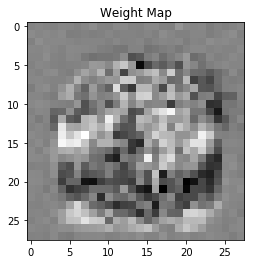

In [78]:
plt.imshow(lr.w[1:].reshape(28,28), cmap='gray');
plt.title("Weight Map")

## Training accuracy over 1 epoch

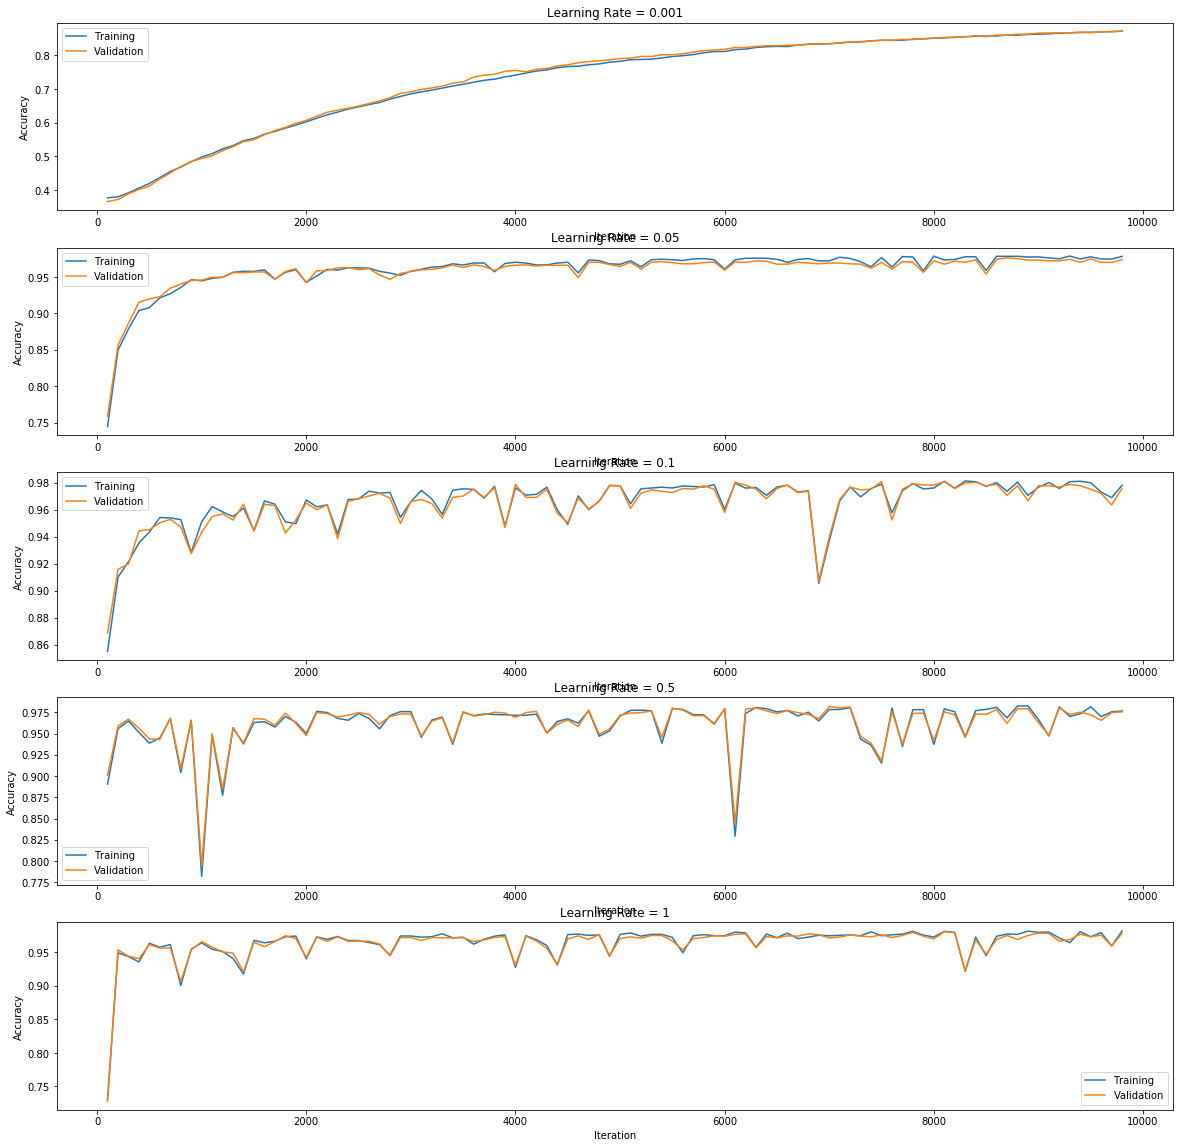

In [79]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 1
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])



## Training accuracy over 5 epoch

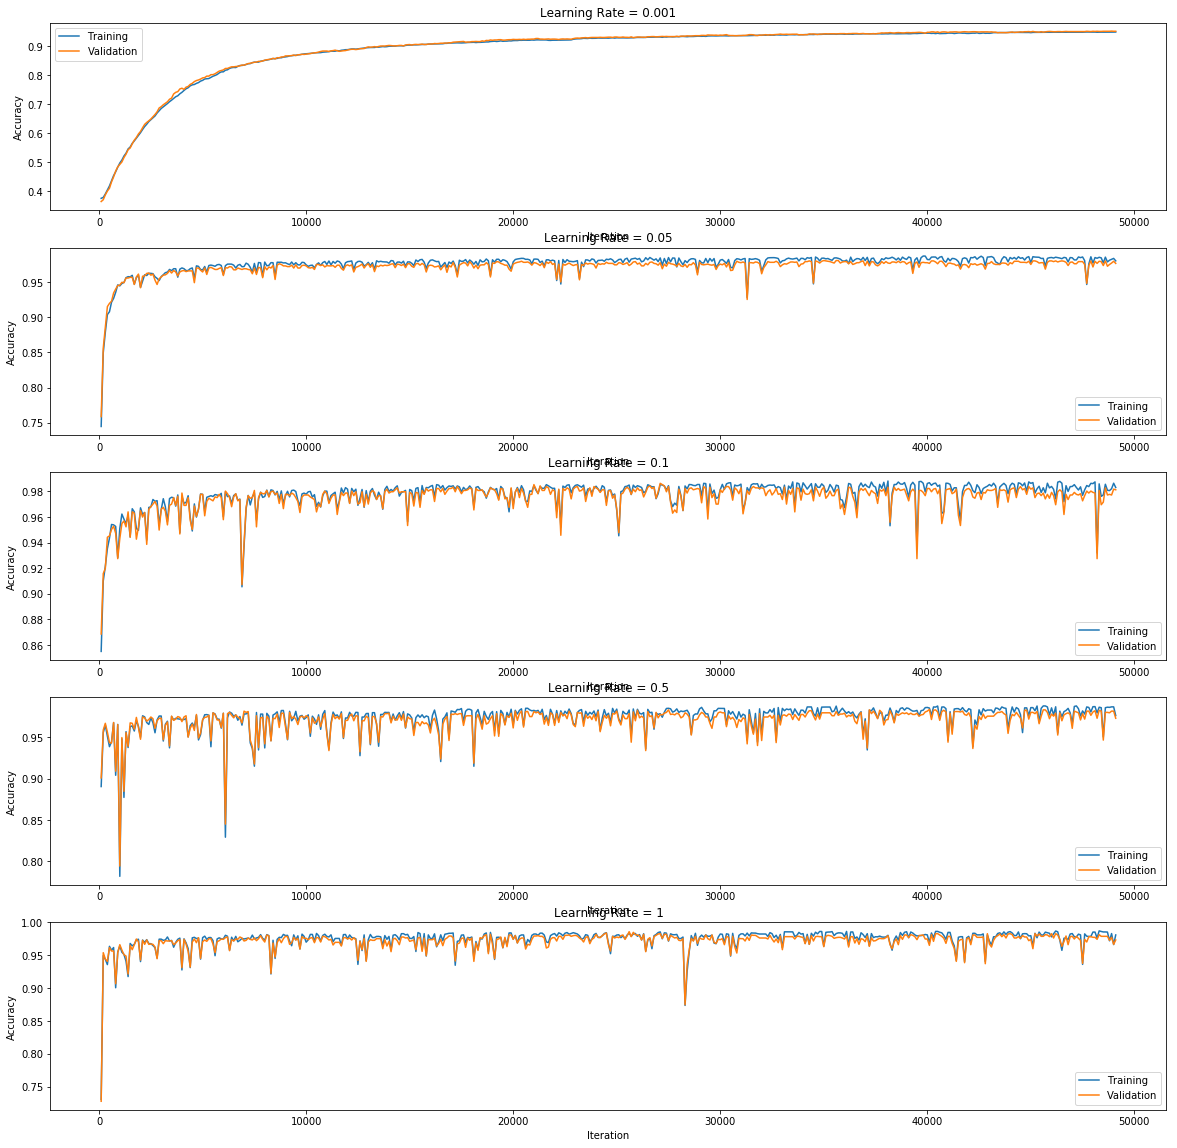

In [80]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 5
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])



## Training accuracy over 10 epochs

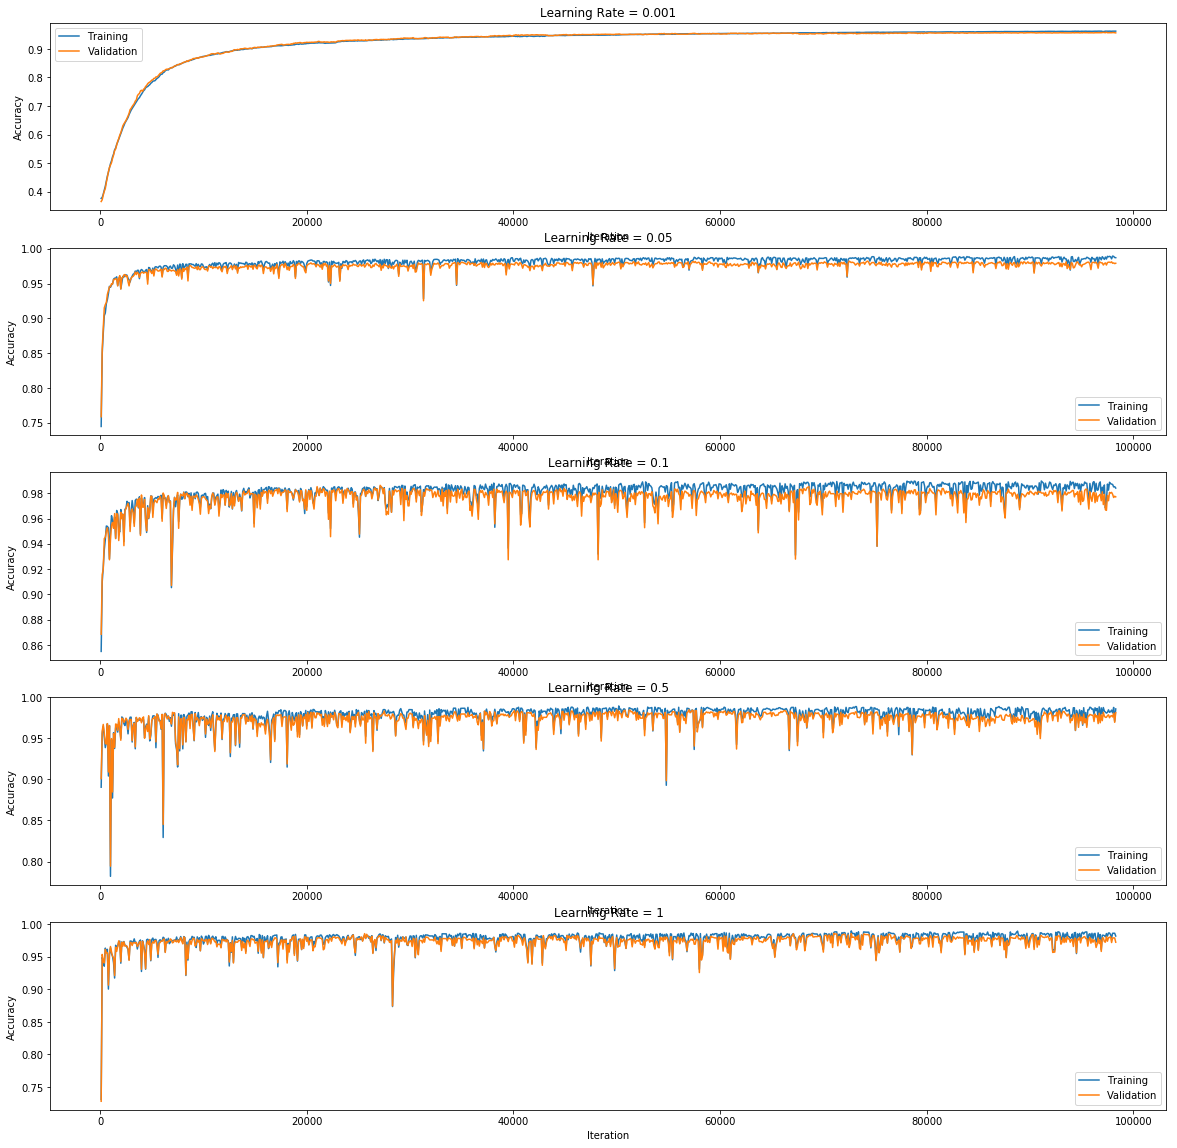

In [81]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 10
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])



## Variable learning rate based on prediction

In [82]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        """
#         self.w = np.random.randn(num_features + 1)
        self.w = np.zeros(num_features + 1)
        self.eta = eta
        
    def compute_score(self, datapoint):
#         print("Dot Product: {}".format(np.dot(self.w[1:], datapoint)))
        return np.dot(self.w[1:], datapoint) + self.w[0]
        
    def sigmoid(self, score, threshold = 20.0):
        """
        Prevent overflow of exp by capping activation at 20.
        :param score: A real valued number to convert into a number between 0 and 1
        """
        
        if abs(score) > threshold:
            score = threshold * np.sign(score)
            
        return 1.0/(1.0 + np.e ** (-score))
        

    def sgd_update(self, x_i, y):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """
 
        # TODO: Finish this function to do a single stochastic gradient descent update
        # and return the updated weight vector
        score = self.compute_score(x_i)
#         print("Score: {}".format(score))
        prediction = self.sigmoid(score)
#         print("Prediction: {}".format(prediction))
#         print("Update value: {}".format(self.eta * (y - prediction) * prediction * (1-prediction)))
#         self.w[1:] = self.w[1:] + self.eta * (y - prediction) * x_i
#         self.w[0] = self.w[0] + self.eta * (y - prediction)
        # These two lines use a trick to adjust the learning rate
        self.w[1:] = self.w[1:] + self.eta * (y - prediction) * prediction * (1-prediction) * x_i
        self.w[0] = self.w[0] + self.eta * (y - prediction) * prediction * (1-prediction)
        return self.w
    
    
    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, computes the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """
 
        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = self.sigmoid(self.w[1:].dot(x_i) + self.w[0])
            if y == 1:
                logprob += np.log(p)
            else:
                logprob += np.log(1.0 - p)
 
            # Get accuracy
            if abs(y - p) < 0.5:
                num_right += 1
 
        return logprob, float(num_right) / float(len(examples_y))

**Q:** After completing the class above, loop over the training data and perform stochastic gradient descent for three different user-defined number of epochs, and five different values of eta range [1e-3, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

In [83]:
x_train = data2.train_x.copy()
y_train = data2.train_y.copy()


In [84]:
# Loop over training data and perform updates
# Sample code:
from sklearn.utils import shuffle
eta = 0.2
epochs = 10
x_train = data2.train_x.copy()
y_train = data2.train_y.copy()
final_valid_results=[]
final_train_results=[]
for eta in [0.001, 0.05, 0.1, 0.5, 1]:
# for eta in [0.01]:
    results_valid = []
    results_train = []
    iteration = 0
    lr = LogReg(x_train.shape[1], eta)
    for epoch in range(epochs):
        x_train, y_train = shuffle(x_train, y_train)
        for x, y in zip(x_train, y_train):
            lr.sgd_update(x, y)
            iteration += 1
            if np.mod(iteration, 100) == 0:
                valid_log_prob, valid_accuracy = lr.progress(data2.valid_x, data2.valid_y)
                results_valid.append([epoch, iteration, eta, valid_accuracy])
                train_log_prob, train_accuracy = lr.progress(data2.train_x, data2.train_y)
                results_train.append([epoch, iteration, eta, train_accuracy])
#                 print([epoch, iteration, eta, valid_accuracy])
#             print("inner loop: {}".format(results_valid))
#         print("outer loop: {}".format(results_valid))
                
    final_valid_results.append(results_valid)
    final_train_results.append(results_train)

    
# shuffle the data

In [85]:
final_valid_arrays = [np.array(result) for result in final_valid_results]
final_train_arrays = [np.array(result) for result in final_train_results]

Text(0.5,1,'Weight Map')

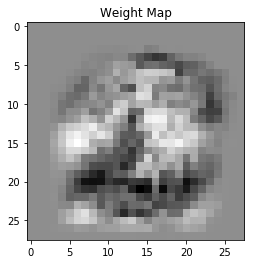

In [86]:
plt.imshow(lr.w[1:].reshape(28,28), cmap='gray');
plt.title("Weight Map")

## Training accuracy over 1 epoch

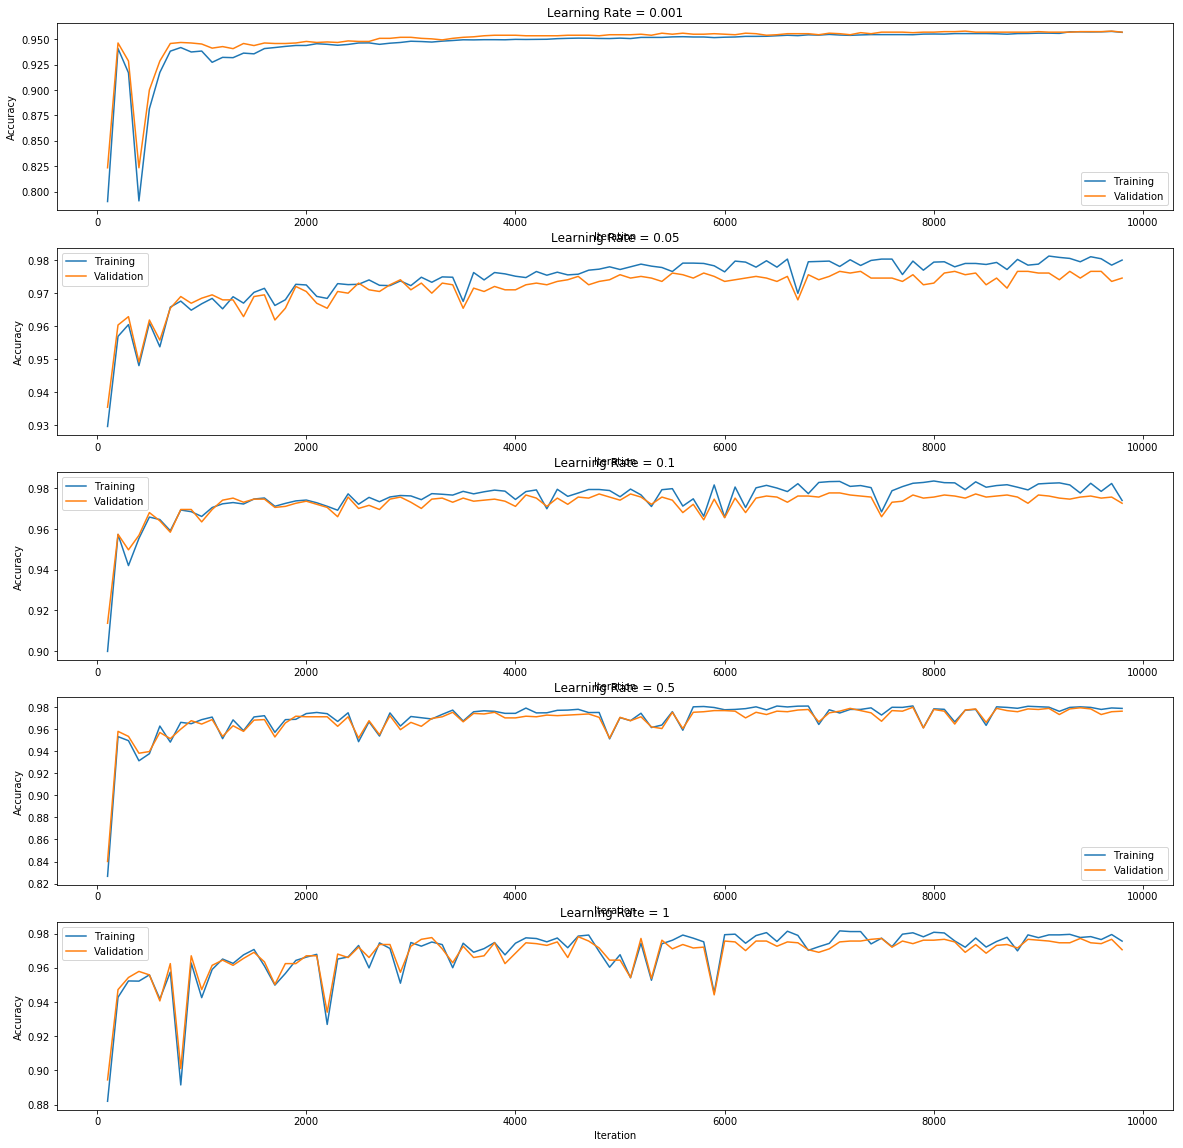

In [87]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 1
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])



## Training accuracy over 5 epoch

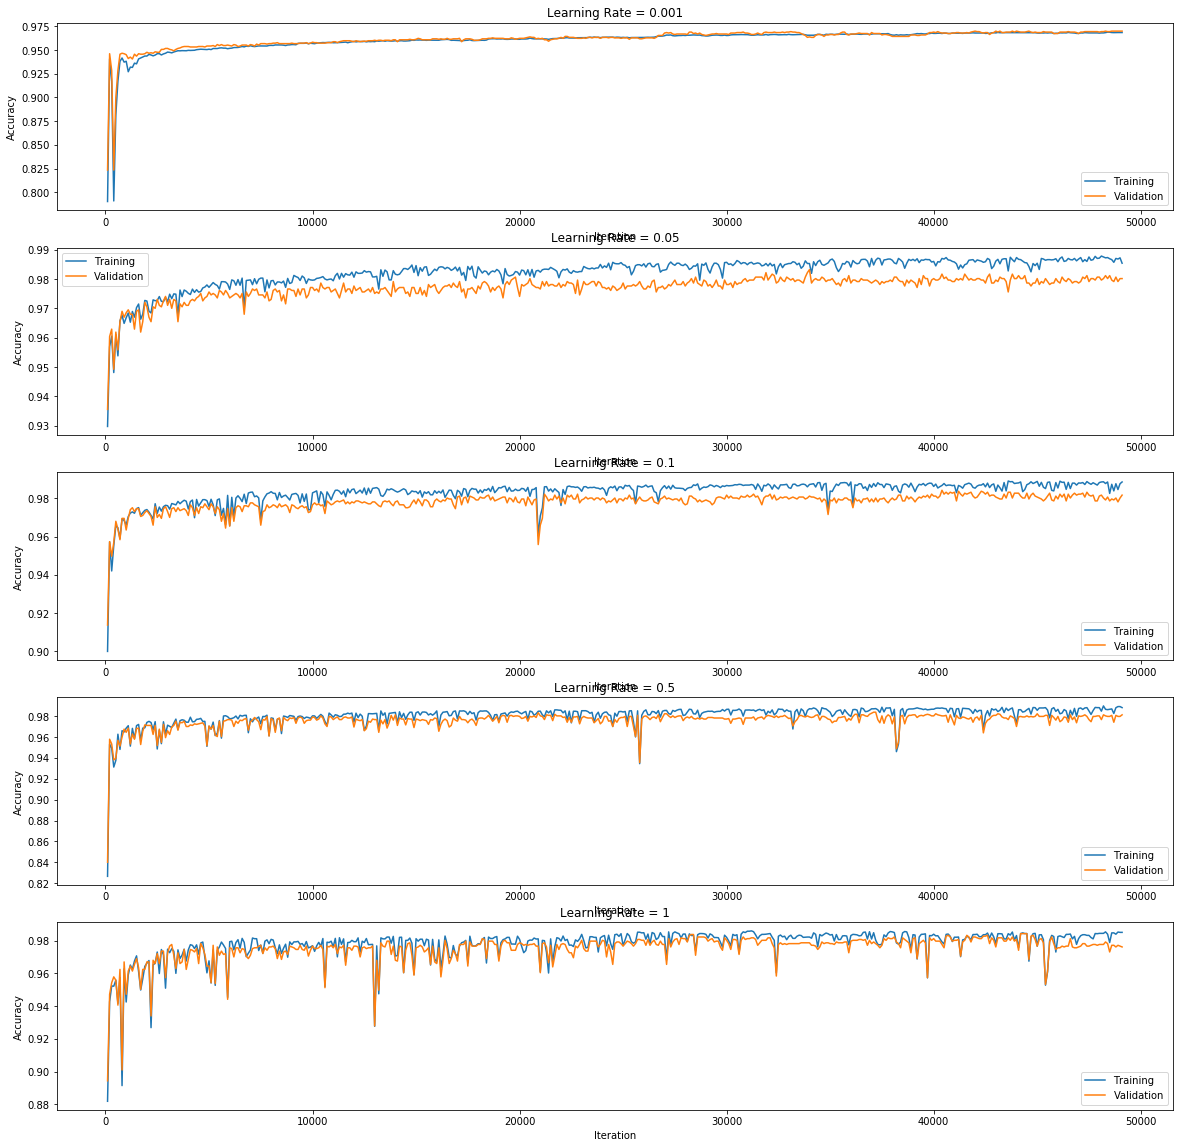

In [88]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 5
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])



## Training accuracy over 10 epochs

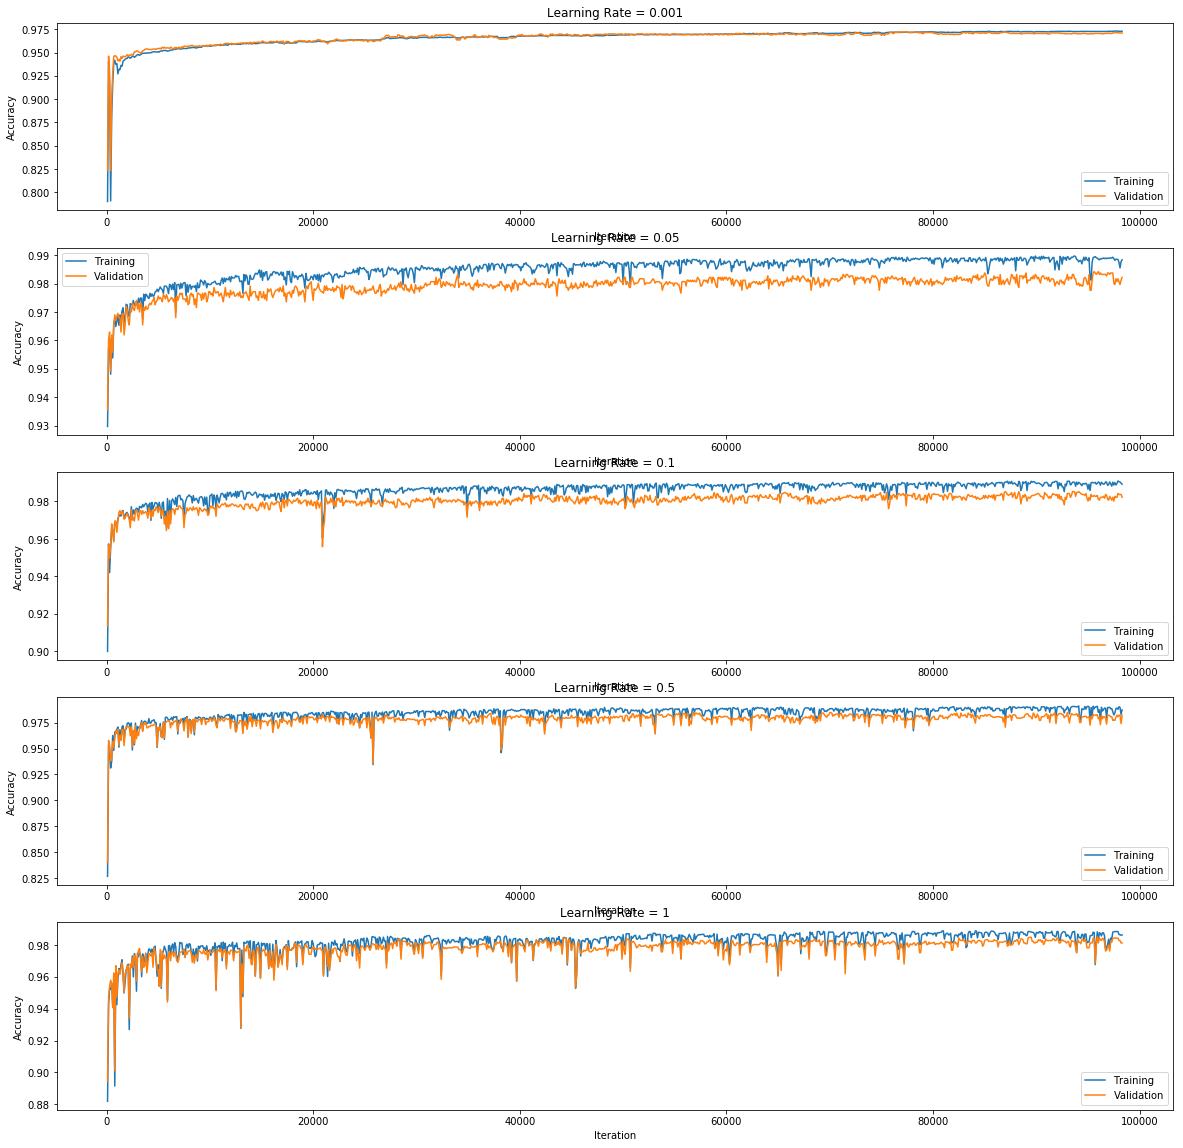

In [89]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(511)
ax2 = plt.subplot(512)
ax3 = plt.subplot(513)
ax4 = plt.subplot(514)
ax5 = plt.subplot(515)
epoch = 10
0.001, 0.05, 0.1, 0.5, 1
iteration = epoch * 9830 // 100
ax1.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[0][:iteration, -1])
ax1.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[0][:iteration, -1])
ax1.set_title("Learning Rate = 0.001")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.legend(["Training", "Validation"])

ax2.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[1][:iteration, -1])
ax2.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[1][:iteration, -1])
ax2.set_title("Learning Rate = 0.05")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Accuracy")
ax2.legend(["Training", "Validation"])


ax3.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[2][:iteration, -1])
ax3.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[2][:iteration, -1])
ax3.set_title("Learning Rate = 0.1")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.legend(["Training", "Validation"])


ax4.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[3][:iteration, -1])
ax4.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[3][:iteration, -1])
ax4.set_title("Learning Rate = 0.5")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Accuracy")
ax4.legend(["Training", "Validation"])


ax5.plot(final_train_arrays[0][:iteration, 1], final_train_arrays[4][:iteration, -1])
ax5.plot(final_train_arrays[0][:iteration, 1], final_valid_arrays[4][:iteration, -1])
ax5.set_title("Learning Rate = 1")
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Accuracy")
ax5.legend(["Training", "Validation"])

